In [1]:
import math
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

验证：阶乘比power增长更快

In [2]:
# 定义比较的值
z = 10.10
n_values = range(1, 21)

# 计算并打印阶乘和幂次的比较
print(f"{'n':>3} {'n!':>20} {'10.10^n':>20}")
for n in n_values:
    factorial = math.factorial(n)
    power = z**n
    print(f"{n:3} {factorial:20} {power:20.2f}")

  n                   n!              10.10^n
  1                    1                10.10
  2                    2               102.01
  3                    6              1030.30
  4                   24             10406.04
  5                  120            105101.01
  6                  720           1061520.15
  7                 5040          10721353.52
  8                40320         108285670.56
  9               362880        1093685272.68
 10              3628800       11046221254.11
 11             39916800      111566834666.53
 12            479001600     1126825030131.97
 13           6227020800    11380932804332.89
 14          87178291200   114947421323762.17
 15        1307674368000  1160968955369998.00
 16       20922789888000 11725786449236978.00
 17      355687428096000 118430443137293472.00
 18     6402373705728000 1196147475686664192.00
 19   121645100408832000 12081089504435306496.00
 20  2432902008176640000 122019003994796589056.00


## The Simple function

$$f(z) = \int^{\infty}_{0} \frac{e^{-zt}}{1+t} dt$$

The numerical calculation is:

In [3]:
def integrand(t, z):
    return np.exp(-z * t) / (1 + t)

z_values = [10, 10.10, 11, 12, 13, 100]

for z in z_values:
    result, error = integrate.quad(integrand, 0, np.inf, args=(z,))
    print(f"For z = {z}:")
    print(f"  Integral result: {result}")
    print(f"  Estimated error: {error}")
    print()

For z = 10:
  Integral result: 0.09156333393978819
  Estimated error: 1.1382248578618783e-09

For z = 10.1:
  Integral result: 0.09072741190001804
  Estimated error: 1.589725634718221e-09

For z = 11:
  Integral result: 0.08384177886034586
  Estimated error: 3.901342646412849e-09

For z = 12:
  Integral result: 0.07732613313891923
  Estimated error: 2.118045599449952e-09

For z = 13:
  Integral result: 0.07175353352446244
  Estimated error: 6.605236343166089e-11

For z = 100:
  Integral result: 0.00990194228673303
  Estimated error: 4.155578730613462e-12



### First divergent asymptotic expansion

$$\sum^{\infty}_{n = 0} (-1)^n \int^{\infty}_0 e^{-zt} t^n dt = \frac{1}{z} - \frac{1}{z^2} + \frac{2!}{z^3} - \frac{3!}{z^4} + ... $$

The numerical calculation:

In [4]:
def series_sum(z, num_terms):
    sum_value = 0
    for n in range(num_terms):
        term = (-1)**n * math.factorial(n) / z**(n + 1)
        sum_value += term
    return sum_value

z_values = [10, 10.10, 11, 12, 13, 100]
num_terms_list = [10, 10, 11, 12, 13, 100]  # choose appropriate term to truncate

for z in z_values:
    for num_terms in num_terms_list:
        approx_result = series_sum(z, num_terms)
        print(f"The result of the series sum for z = {z} with {num_terms} terms is: {approx_result}")

    print("-------------------------------------------------")


The result of the series sum for z = 10 with 10 terms is: 0.09154563200000002
The result of the series sum for z = 10 with 10 terms is: 0.09154563200000002
The result of the series sum for z = 10 with 11 terms is: 0.09158192000000001
The result of the series sum for z = 10 with 12 terms is: 0.09154200320000001
The result of the series sum for z = 10 with 13 terms is: 0.09158990336000002
The result of the series sum for z = 10 with 100 terms is: -8.4771431867839e+55
-------------------------------------------------
The result of the series sum for z = 10.1 with 10 terms is: 0.09071146619621775
The result of the series sum for z = 10.1 with 10 terms is: 0.09071146619621775
The result of the series sum for z = 10.1 with 11 terms is: 0.09074399199127904
The result of the series sum for z = 10.1 with 12 terms is: 0.09070856785804397
The result of the series sum for z = 10.1 with 13 terms is: 0.09075065593713513
The result of the series sum for z = 10.1 with 100 terms is: -3.131227080928874e

$$\frac{n!}{n^{n+1}} \sim \frac{\sqrt{2 \pi n} n^n e^{-n}}{n^{n+1}} = \sqrt{2\pi} n^{\frac{1}{2}} e^{-n} \approx \sqrt{2\pi} z^{\frac{1}{2}} e^{-z}$$

### The analysis for size of reminders on level 0 

渐进性的余项大小分析

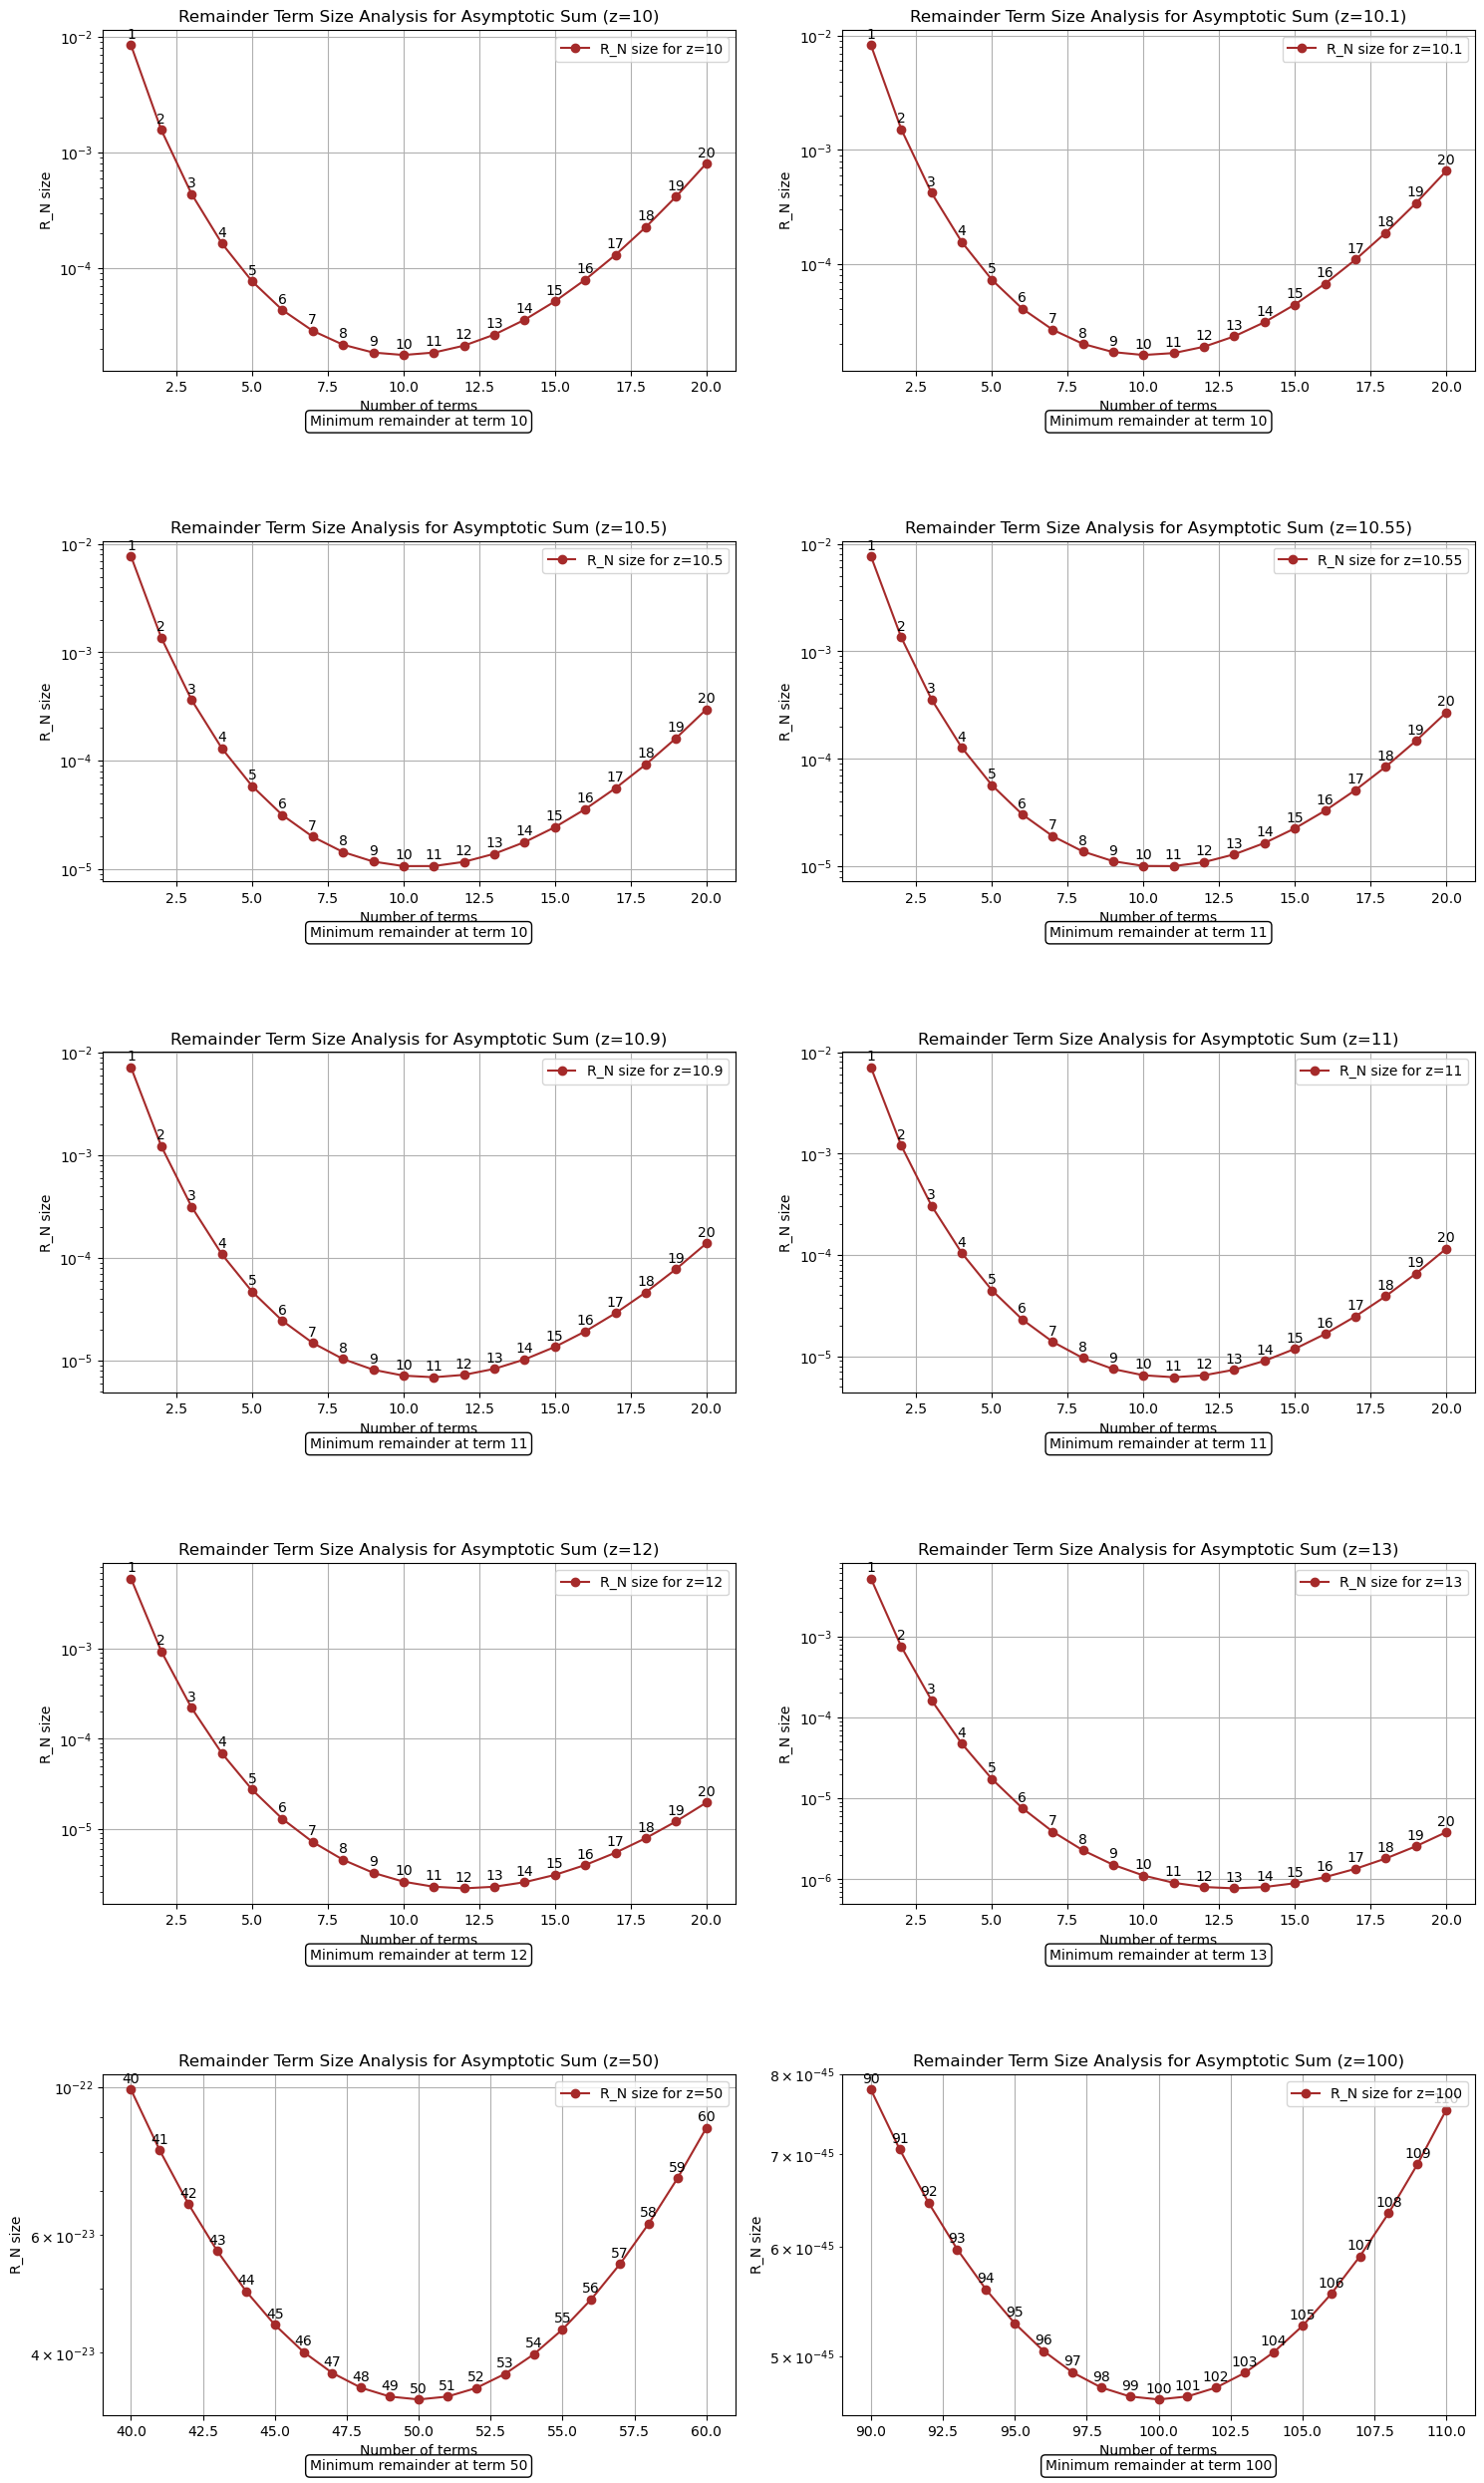

In [6]:
from scipy.integrate import quad

def asymptotic_sum(z, num_terms):
    sum_value = 0
    for n in range(num_terms):
        term = (-1)**n * math.factorial(n) / z**(n + 1)
        sum_value += term
    return sum_value

def remainder_term(z, N):
    integrand = lambda t: (np.exp(-z * t) * t**N) / (1 + t)
    R_N, _ = quad(integrand, 0, np.inf)
    return (-1)**N * R_N

z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 50, 100]
terms_ranges = {
    10: range(1, 21),
    10.10: range(1, 21),
    10.50: range(1, 21),
    10.55: range(1, 21),
    10.90: range(1, 21),
    11: range(1, 21),
    12: range(1, 21),
    13: range(1, 21),
    50: range(40, 61),
    100: range(90, 111)
}

# Set up subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()  # Flatten the array of subplots for easier indexing

for idx, z_value in enumerate(z_values):
    terms = terms_ranges[z_value]
    remainder_results = []
    
    for num_terms in terms:
        R_N_value = remainder_term(z_value, num_terms)
        remainder_results.append((num_terms, abs(R_N_value)))
    
    terms_list, remainder_sizes = zip(*remainder_results)
    
    # Find the term with the minimum remainder
    min_remainder_term = terms_list[np.argmin(remainder_sizes)]
    min_remainder_value = min(remainder_sizes)
    
    # Plot the remainder size for each z value
    axes[idx].plot(terms_list, remainder_sizes, marker='o', color='brown', label=f'R_N size for z={z_value}')
    axes[idx].set_xlabel('Number of terms')
    axes[idx].set_ylabel('R_N size')
    axes[idx].set_title(f'Remainder Term Size Analysis for Asymptotic Sum (z={z_value})')
    axes[idx].set_yscale('log')  # Use logarithmic scale for better visualization
    axes[idx].grid(True)
    
    # Add annotation showing the term with the minimum remainder
    axes[idx].annotate(f'Minimum remainder at term {min_remainder_term}', 
                       xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    
    # Annotate each point
    for num_terms, remainder_size in zip(terms_list, remainder_sizes):
        axes[idx].annotate(f'{num_terms}', (num_terms, remainder_size), textcoords="offset points", xytext=(0,5), ha='center')
    
    axes[idx].legend()

# Remove unused subplots
for i in range(len(z_values), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

p[0] := 1/2*N!/z^(N+1)
p[1] := 1/4*N!/z^(N+1) - 1/4*(N+1)!/z^(N+2)
for m from 1 to 50 do p[m+1] := 1/2/z*((z-N-m-1)*p[m] + m/2*p[m-1]) od:

f - app[N-1];
add(p[j], j = 0..39);
%%-%;

plot1 := plot([[j, ln(abs(j!/z^(j+1)))/ln(10)] $j=0..35],style=point, colour=red)
plot1 := plot([[j+N, ln(abs(p[j]))/ln(10)] $j=0..50],style=point, colour=blue)
display({plot1,plot2})


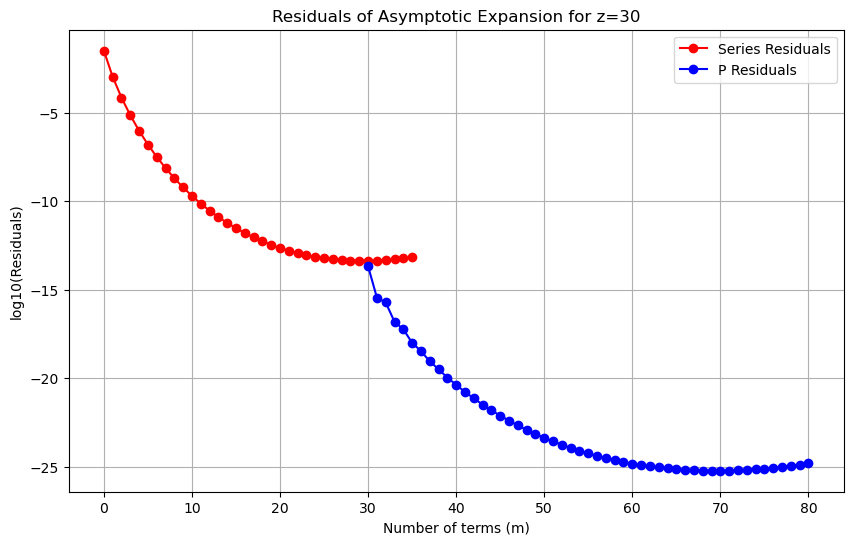

In [7]:
# 定义 p[0] 和 p[1]
def P_0(z, N):
    return 1/2 * math.factorial(N) / z**(N + 1)

def P_1(z, N):
    return 1/4 * math.factorial(N) / z**(N + 1) - 1/4 * math.factorial(N + 1) / z**(N + 2)

# 递推关系计算 p[m]
def P_m_recurrent(z, m, N, P_prev, P_prev_prev):
    return ((z - m - N - 1) * P_prev + 1/2 * m * P_prev_prev) / (2 * z)

# 参数
z = 30
N = 30 # 假设 N = z

# 初始化数组存储结果
M_max = 50
P_values = np.zeros(M_max + 1)

# 计算 p[0] 和 p[1]
P_values[0] = P_0(z, N)
P_values[1] = P_1(z, N)

# 递推关系计算 p[m]
for m in range(1, M_max):
    P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

# 计算级数项的对数残差
series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(36)]
P_residuals = [np.log10(abs(P_values[j])) for j in range(51)]

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(range(36), series_residuals, 'ro-', label='Series Residuals')
plt.plot(range(N, N + 51), P_residuals, 'bo-', label='P Residuals')

plt.xlabel('Number of terms (m)')
plt.ylabel('log10(Residuals)')
plt.title('Residuals of Asymptotic Expansion for z=30')
plt.grid(True)
plt.legend()
plt.show()


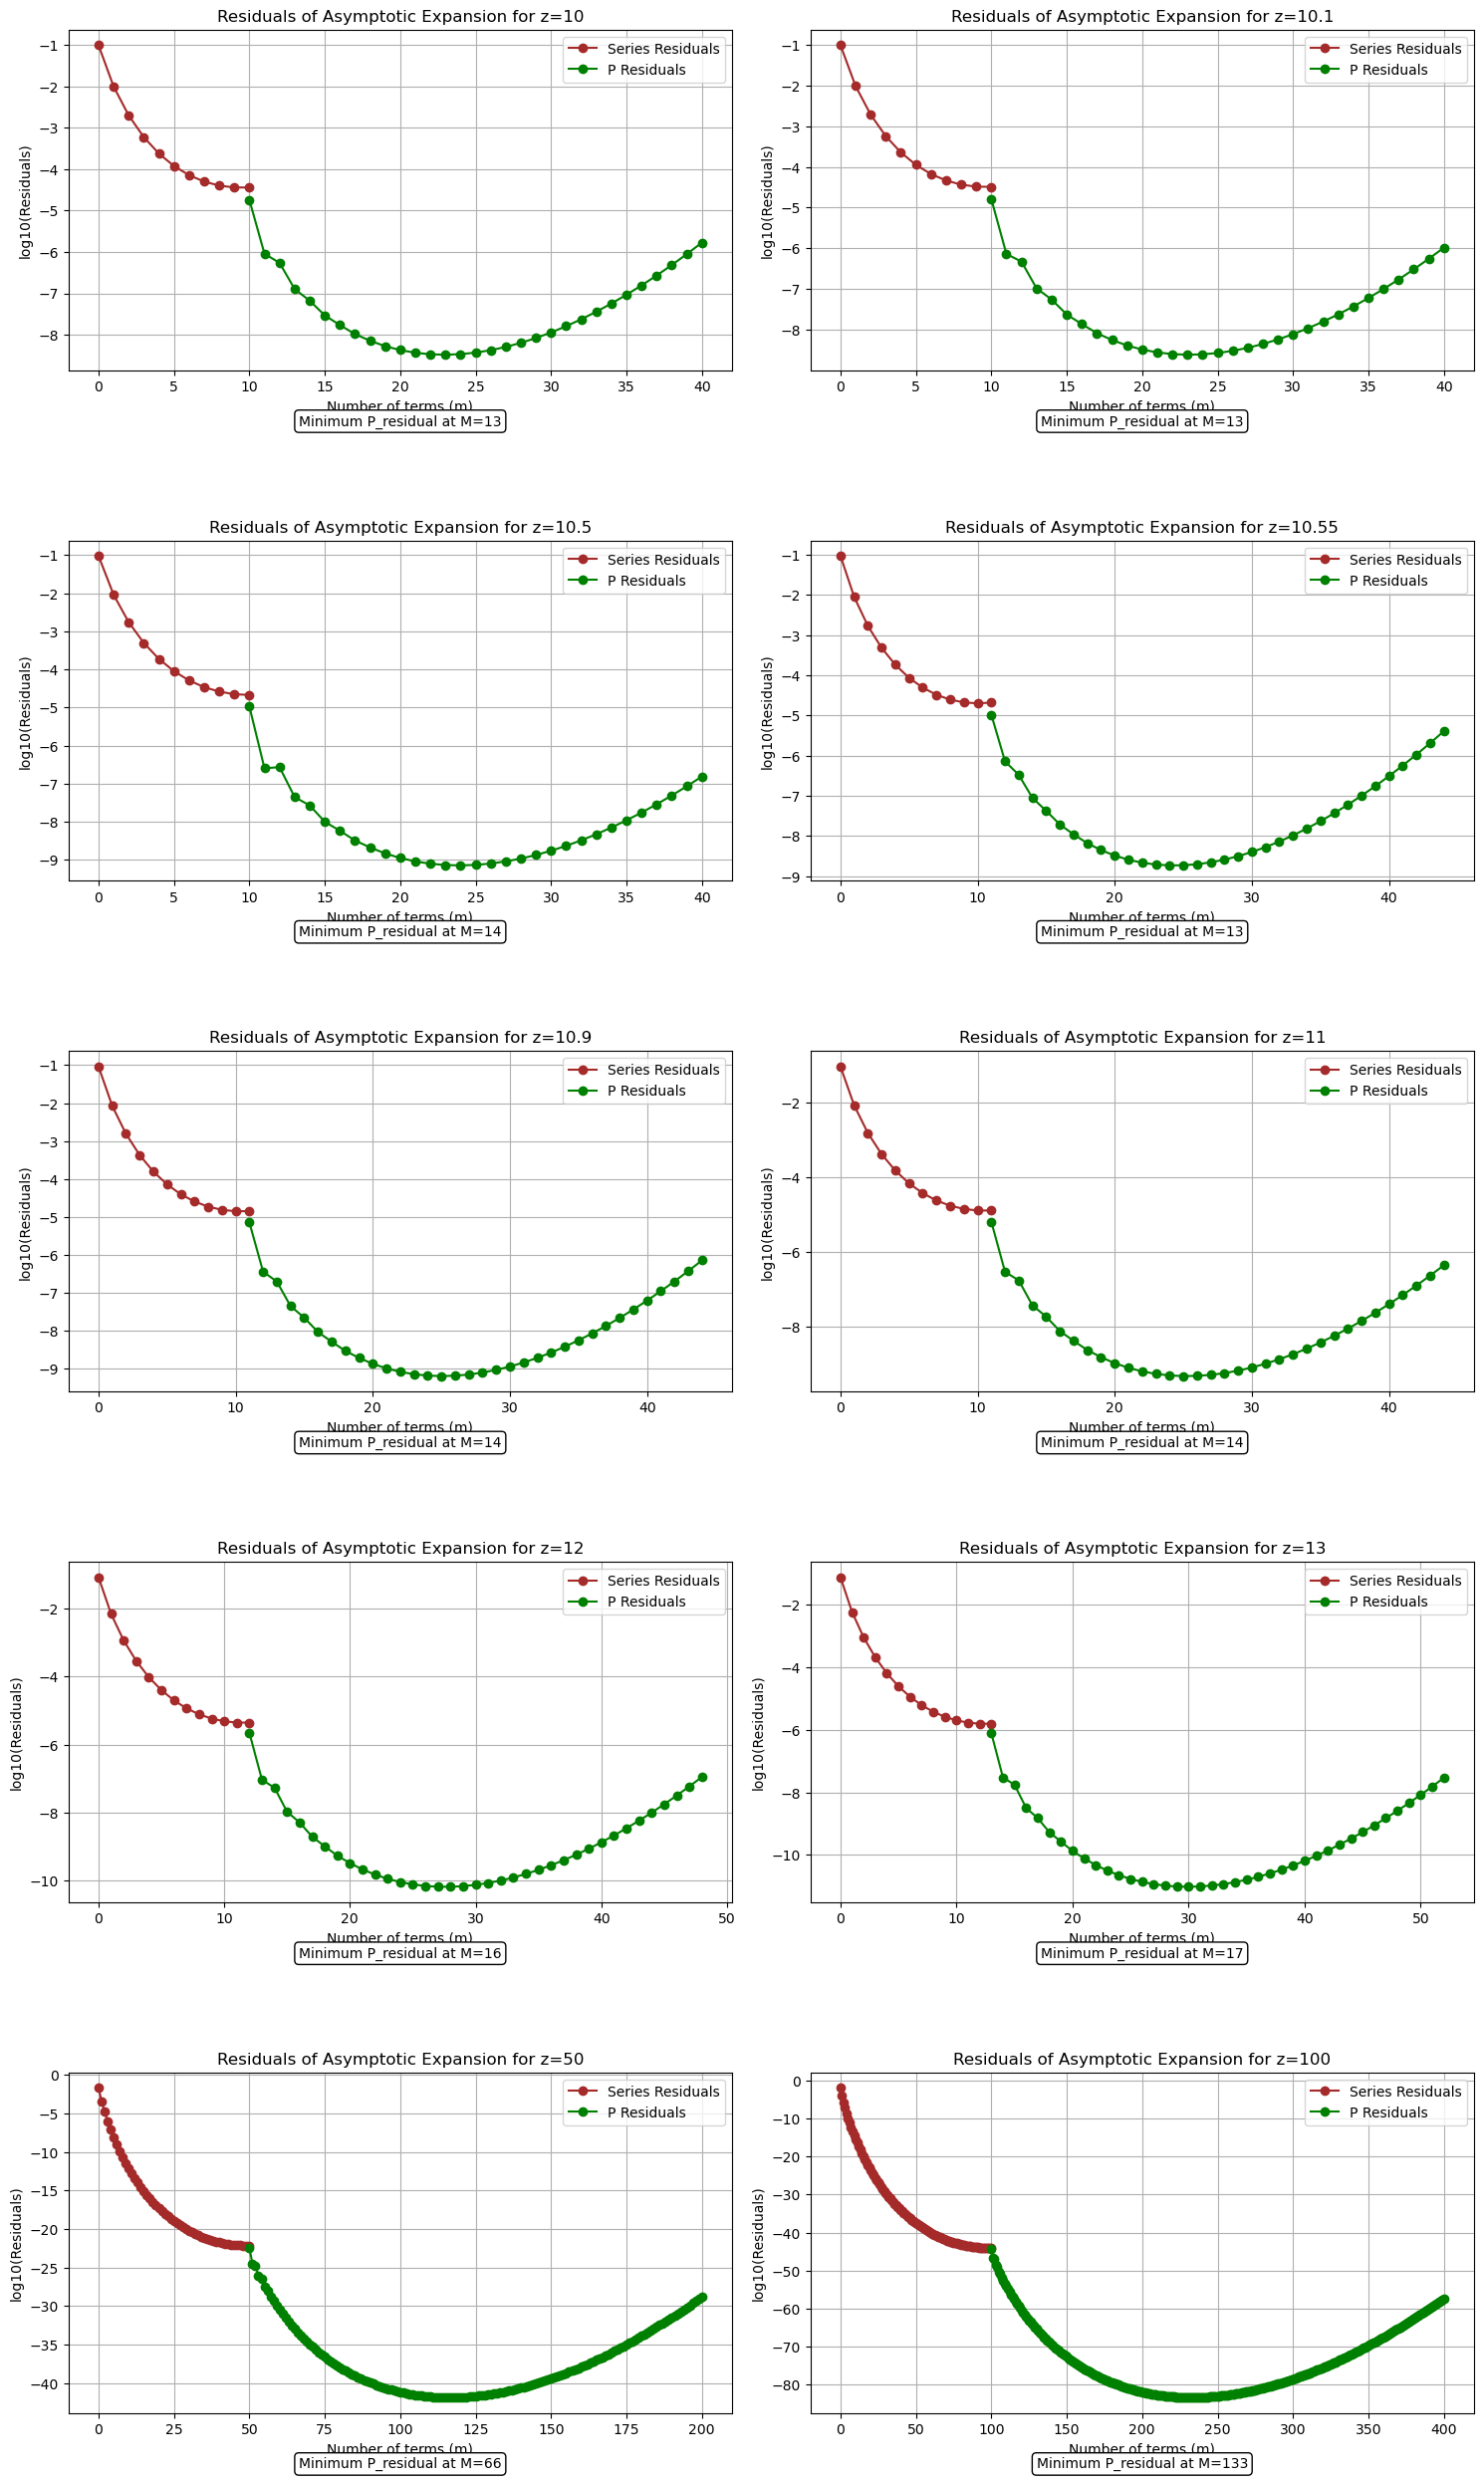

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

def P_0(z, N):
    return 1/2 * math.factorial(N) / z**(N + 1)

def P_1(z, N):
    return 1/4 * math.factorial(N) / z**(N + 1) - 1/4 * math.factorial(N + 1) / z**(N + 2)

def P_m_recurrent(z, m, N, P_prev, P_prev_prev):
    return ((z - m - N - 1) * P_prev + 1/2 * m * P_prev_prev) / (2 * z)

# 参数设置
z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 50, 100]

# 设置子图
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()  # 将子图数组展平以便于索引

min_M_values = []  # 用于存储每个 z 值的蓝线最低点时 M 的取值

for idx, z in enumerate(z_values):
    N = round(z)
    M_max = 3 * N  # 设定最大项数
    
    # 初始化数组存储结果
    P_values = np.zeros(M_max + 1)

    # 计算 p[0] 和 p[1]
    P_values[0] = P_0(z, N)
    P_values[1] = P_1(z, N)

    # 递推关系计算 p[m]
    for m in range(1, M_max):
        P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

    # 计算级数项的对数残差
    series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
    P_residuals = [np.log10(abs(P_values[j])) for j in range(M_max + 1)]

    # 找到 P_residuals 中的最小值及其对应的 M
    min_P_residual = min(P_residuals)
    min_M = P_residuals.index(min_P_residual) + N  # 调整索引到正确的 M 值
    min_M_values.append((z, min_M))

    # 绘制结果
    axes[idx].plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals')
    axes[idx].plot(range(N, N + M_max + 1), P_residuals, 'o-', color='green', label='P Residuals')
    
    axes[idx].set_xlabel('Number of terms (m)')
    axes[idx].set_ylabel('log10(Residuals)')
    axes[idx].set_title(f'Residuals of Asymptotic Expansion for z={z}')
    axes[idx].grid(True)
    axes[idx].legend()

    # 添加注释显示最小残差对应的 M 值
    axes[idx].annotate(f'Minimum P_residual at M={min_M - N}', 
                       xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


In [9]:
# print(P_values[0], P_values[1])

In [10]:
import math
import numpy as np
from scipy.integrate import quad

# Level 0 Approximation:定义 f(z)
def f(z):
    integrand = lambda t: np.exp(-z * t) / (1 + t)
    result, _ = quad(integrand, 0, np.inf)
    return result

# Level 1 定义 P_0 和 P_1
def P_0(z, N):
    return 1/2 * math.factorial(N) / z**(N + 1)

def P_1(z, N):
    return 1/4 * math.factorial(N) / z**(N + 1) - 1/4 * math.factorial(N + 1) / z**(N + 2)

def P_m_recurrent(z, m, N, P_prev, P_prev_prev):
    return ((z - m - N - 1) * P_prev + 1/2 * m * P_prev_prev) / (2 * z)

# 参数设置
z = 30  # 示例 z 值
N = 30  # 根据上下文定义 N 的值

# 计算第一次近似
level0_approximation = sum([((-1)**n * math.factorial(n) / z**(n + 1)) for n in range(N)])

# 初始化数组存储第二次近似结果
M_max = 3 * N  # 设定最大项数
P_values = np.zeros(M_max + 1)

# 计算 p[0] 和 p[1]
P_values[0] = P_0(z, N)
P_values[1] = P_1(z, N)

# 递推关系计算 p[m]
for m in range(1, M_max):
    P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

# 计算第二次近似
level1_approximation = sum([P_values[j] for j in range(N, N + 40)])

# 计算实际值
actual_value = f(z)

# 计算差值
difference = actual_value - level0_approximation - level1_approximation

# 输出结果
print(f'Actual value: {actual_value}')
print(f'Level 0 approximation: {level0_approximation}')
print(f'Level 1 approximation: {level1_approximation}')
print(f'Difference: {difference}')

Actual value: 0.03228973875898013
Level 0 approximation: 0.03228973875895884
Level 1 approximation: -3.156110239553691e-23
Difference: 2.128852652874848e-14


In [11]:
# 参数设置
z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 50, 100]

results = []

for z in z_values:
    N = round(z)  # 根据上下文定义 N 的值

    # 计算第一次近似
    level0_approximation = sum([((-1)**n * math.factorial(n) / z**(n + 1)) for n in range(N)])

    # 初始化数组存储第二次近似结果
    M_max = 3 * N  # 设定最大项数
    P_values = np.zeros(M_max + 1)

    # 计算 p[0] 和 p[1]
    P_values[0] = P_0(z, N)
    if M_max >= 1:
        P_values[1] = P_1(z, N)

    # 递推关系计算 p[m]
    for m in range(1, M_max):
        P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

    # 计算第二次近似
    level1_approximation = sum([P_values[j] for j in range(N, N + 40) if j < len(P_values)])

    # 计算实际值
    actual_value = f(z)

    # 计算差值
    difference = actual_value - level0_approximation - level1_approximation

    # 输出结果
    results.append((z, actual_value, level0_approximation, level1_approximation, difference))

# 打印所有结果
for res in results:
    z, actual_value, level0_approximation, level1_approximation, difference = res
    print(f'z = {z}')
    print(f'  Actual value: {actual_value}')
    print(f'  Level 0 approximation: {level0_approximation}')
    print(f'  Level 1 approximation: {level1_approximation}')
    print(f'  Difference: {difference}')
    print('------------------------------------------------------')

z = 10
  Actual value: 0.09156333393978819
  Level 0 approximation: 0.09154563200000002
  Level 1 approximation: 1.10948274448321e-06
  Difference: 1.6592457043689593e-05
------------------------------------------------------
z = 10.1
  Actual value: 0.09072741190001804
  Level 0 approximation: 0.09071146619621775
  Level 1 approximation: 6.795439277429012e-07
  Difference: 1.526615987254236e-05
------------------------------------------------------
z = 10.5
  Actual value: 0.08753172672423104
  Level 0 approximation: 0.08752112389733911
  Level 1 approximation: 9.960792488227194e-08
  Difference: 1.0503218967046102e-05
------------------------------------------------------
z = 10.55
  Actual value: 0.08714810566194375
  Level 0 approximation: 0.08715815589439953
  Level 1 approximation: -2.7147602727968116e-06
  Difference: -7.335472182977598e-06
------------------------------------------------------
z = 10.9
  Actual value: 0.08455454717062806
  Level 0 approximation: 0.0845614538222

calculate complex integral √

real function level 2

第二部分code复现一下 √

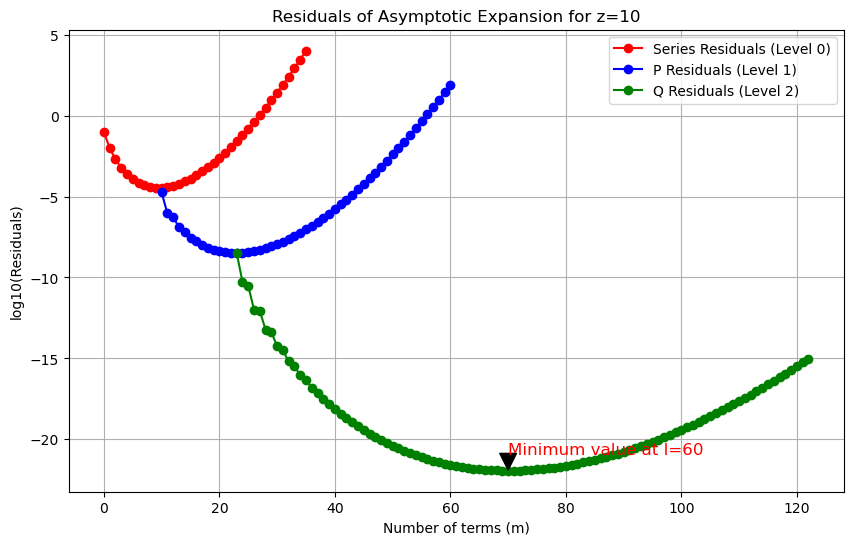

60

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 定义 p[0] 和 p[1]
def P_0(z, N):
    return 1/2 * math.factorial(N) / z**(N + 1)

def P_1(z, N):
    return 1/4 * math.factorial(N) / z**(N + 1) - 1/4 * math.factorial(N + 1) / z**(N + 2)

# 递推关系计算 p[m]
def P_m_recurrent(z, m, N, P_prev, P_prev_prev):
    return ((z - m - N - 1) * P_prev + 1/2 * m * P_prev_prev) / (2 * z)

# 计算 Q 序列
def compute_Q_sequence_from_min(P_min, P_min_plus_1, z, N, M, num_terms):
    Q = [P_min, 0.5 * P_min + 0.5 * P_min_plus_1]

    for l in range(1, num_terms - 1):
        Q_l_minus_1 = Q[l - 1] if l - 1 >= 0 else 0
        Q_l = Q[l]
        Q_l_plus_1 = Q[l + 1] if l + 1 < len(Q) else 0

        term1 = (40 * z - 8 * N - 8 * M - 16) * Q_l_plus_1
        term2 = (4 * N + 6 * M - 12 * z + 10 - 4 * l) * Q_l
        term3 = 3 * l * Q_l_minus_1

        Q_l_plus_2 = (term1 + term2 + term3) / (32 * z)
        Q.append(Q_l_plus_2)

    return Q

# 参数设置
z = 10
N = round(z)
M = 13
M_max = 50  # 设置最大项数

# 计算 Level 0 和 Level 1 的 P_m 值
P_values = np.zeros(M_max + 1)
P_values[0] = P_0(z, N)
P_values[1] = P_1(z, N)

for m in range(1, M_max):
    P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

# 找到 P 序列中的最小值及其索引
min_P_index = np.argmin(np.abs(P_values))
min_P_value = P_values[min_P_index]

# 计算 Q 序列，从 P 序列的最小值开始
num_terms = 100
Q_sequence = compute_Q_sequence_from_min(P_values[min_P_index], P_values[min_P_index + 1], z, N, M, num_terms)

# 查找 Q 序列中的最小值及其索引
min_Q_value = min(Q_sequence, key=abs)
min_Q_index = Q_sequence.index(min_Q_value) + min_P_index

# 计算级数项的对数残差
series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(36)]
P_residuals = [np.log10(abs(P_values[j])) for j in range(51)]
Q_residuals = [np.log10(abs(q)) for q in Q_sequence]

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(range(36), series_residuals, 'ro-', label='Series Residuals (Level 0)')
plt.plot(range(N, N + 51), P_residuals, 'bo-', label='P Residuals (Level 1)')
plt.plot(range(min_P_index + N, min_P_index + N + len(Q_residuals)), Q_residuals, 'go-', label='Q Residuals (Level 2)')

plt.xlabel('Number of terms (m)')
plt.ylabel('log10(Residuals)')
plt.title(f'Residuals of Asymptotic Expansion for z={z}')
plt.grid(True)
plt.legend()

# 标注 Q 序列中的最小值
plt.annotate(f'Minimum value at l={min_Q_index}',
             xy=(min_Q_index + N, np.log10(abs(min_Q_value))),
             xytext=(min_Q_index + N, np.log10(abs(min_Q_value)) + 1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='red')

plt.show()

min_Q_index

why min Q index = 60?

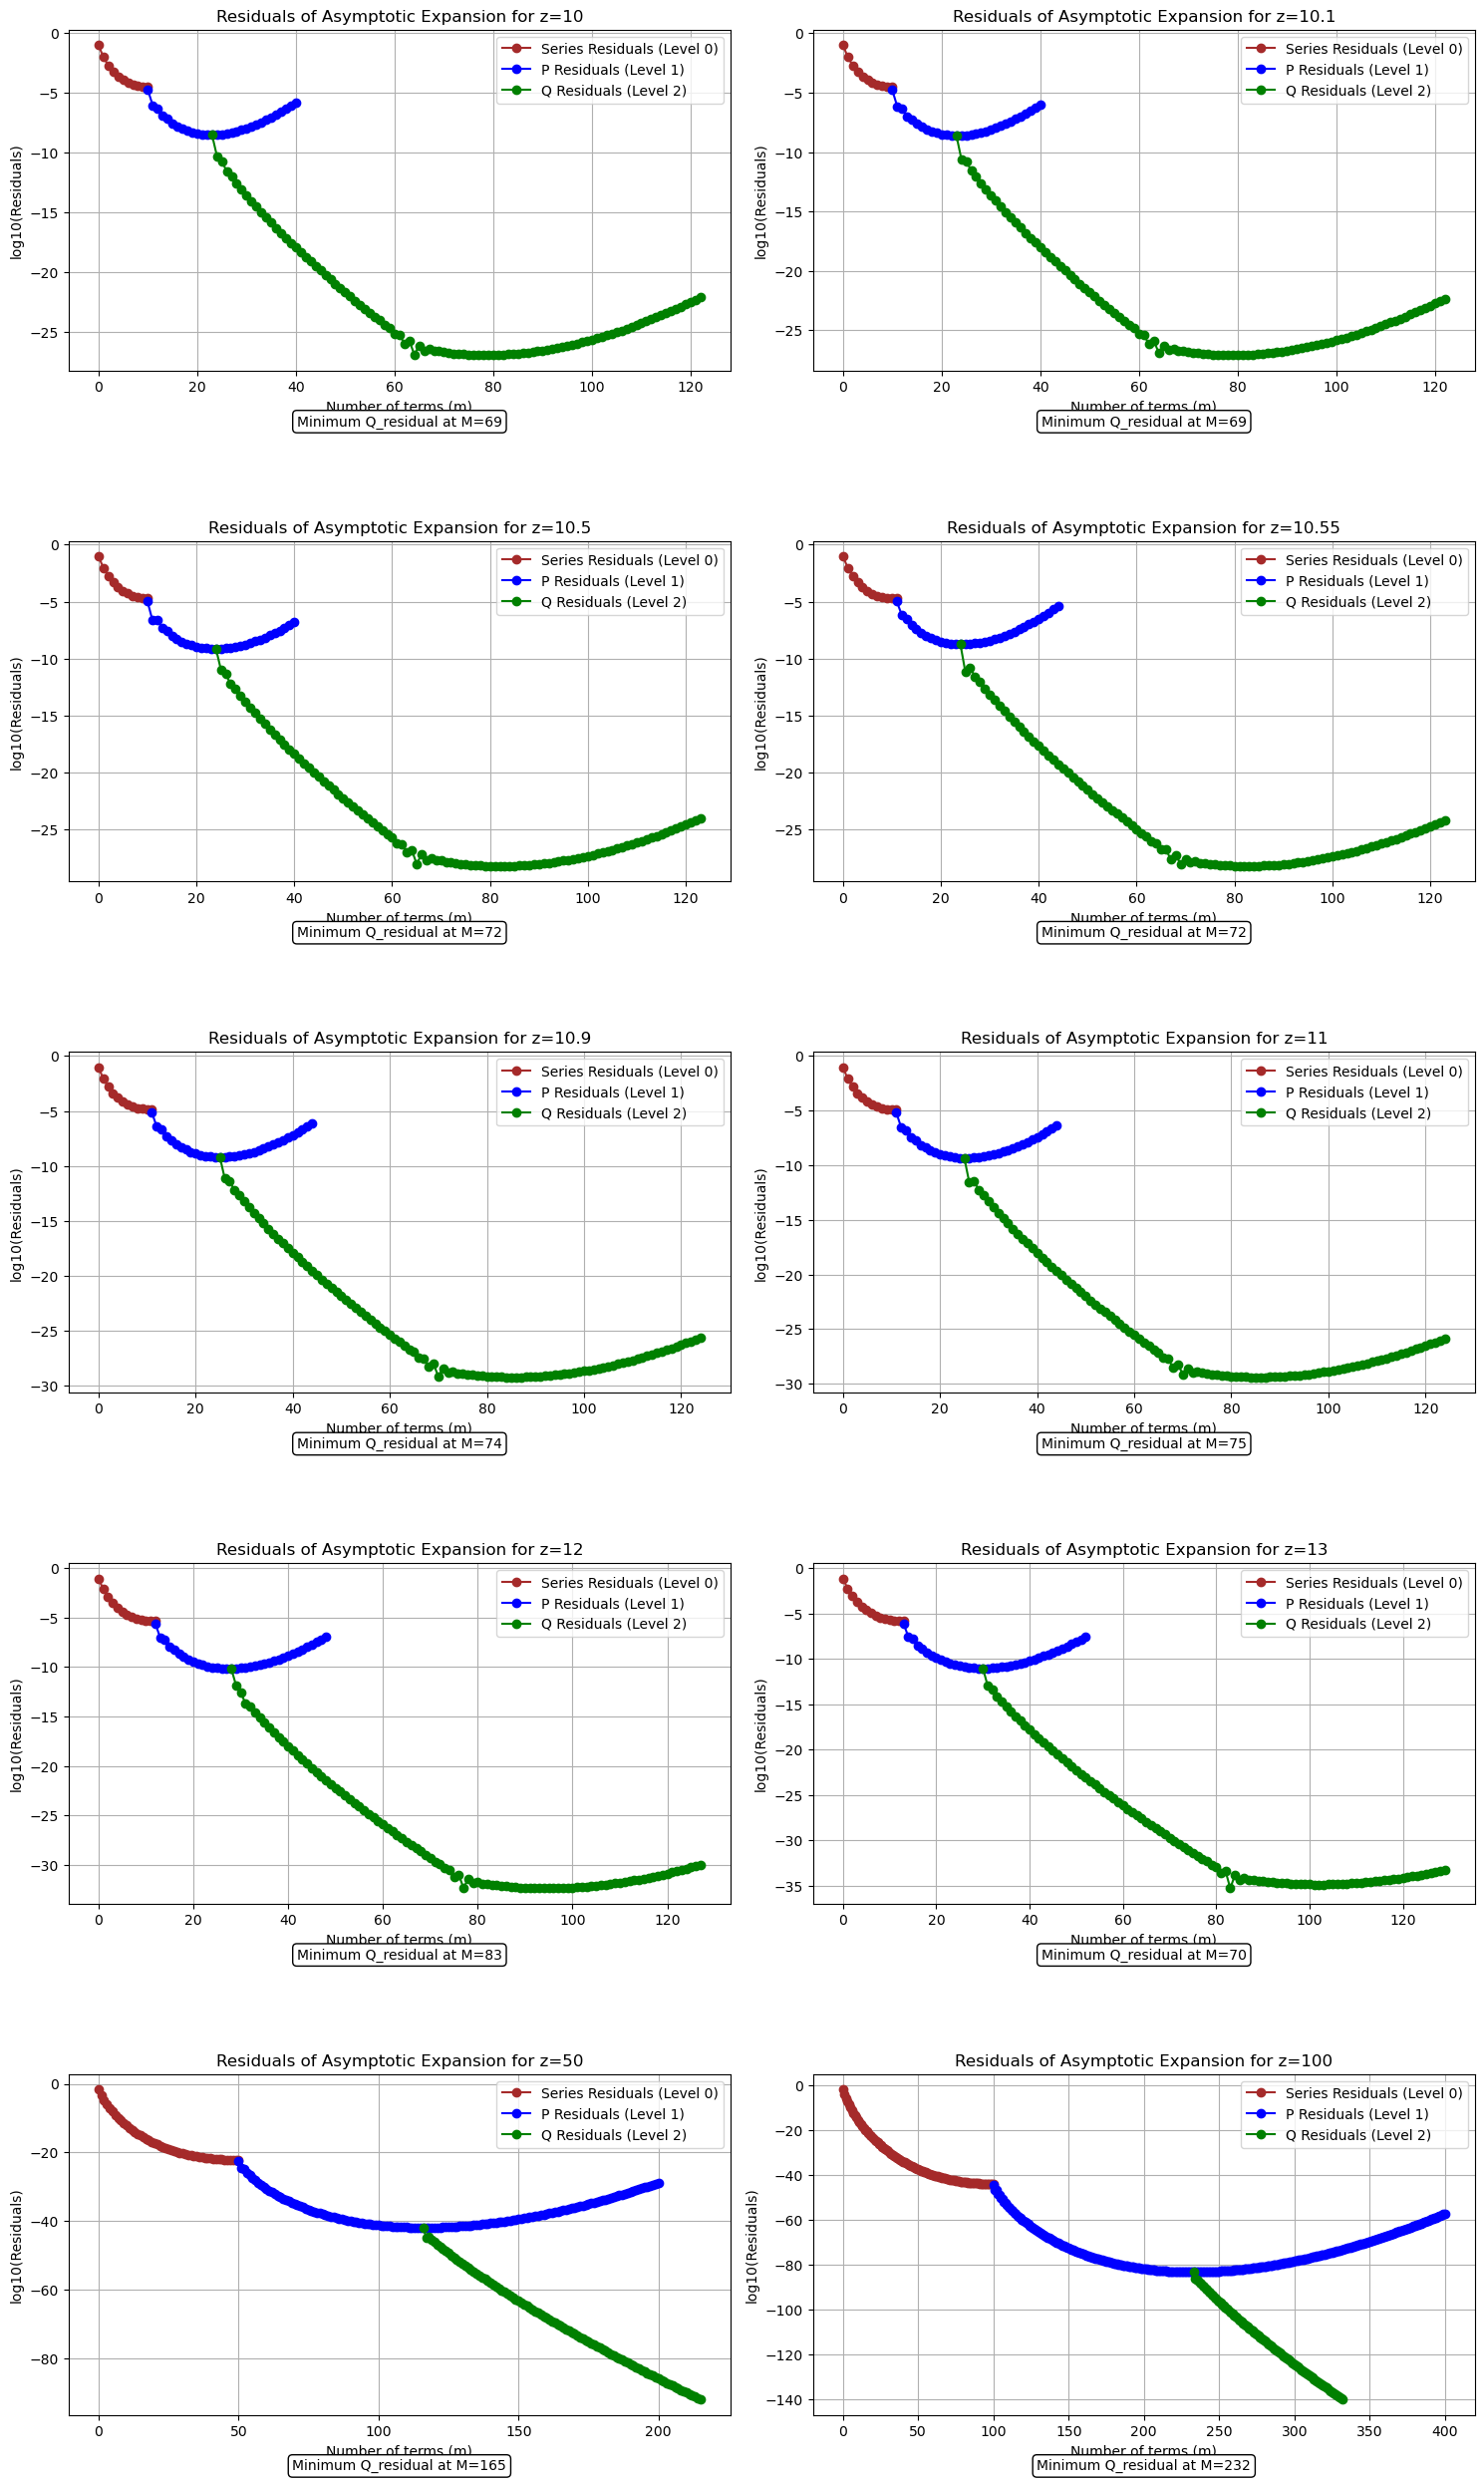

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt

def P_0(z, N):
    return 1/2 * math.factorial(N) / z**(N + 1)

def P_1(z, N):
    return 1/4 * math.factorial(N) / z**(N + 1) - 1/4 * math.factorial(N + 1) / z**(N + 2)

def P_m_recurrent(z, m, N, P_prev, P_prev_prev):
    return ((z - m - N - 1) * P_prev + 1/2 * m * P_prev_prev) / (2 * z)

# 计算 Q 序列
def compute_Q_sequence_from_min(P_min, P_min_plus_1, z, N, M, num_terms):
    Q = [P_min, 0.5 * P_min + 0.5 * P_min_plus_1]

    for l in range(1, num_terms - 1):
        Q_l_minus_1 = Q[l - 1] if l - 1 >= 0 else 0
        Q_l = Q[l]
        Q_l_plus_1 = Q[l + 1] if l + 1 < len(Q) else 0

        term1 = (40 * z - 8 * N - 8 * M - 16) * Q_l_plus_1
        term2 = (4 * N + 6 * M - 12 * z + 10 - 4 * l) * Q_l
        term3 = 3 * l * Q_l_minus_1

        Q_l_plus_2 = (term1 + term2 + term3) / (32 * z)
        Q.append(Q_l_plus_2)

    return Q

# 参数设置
z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 50, 100]

# 设置子图
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()  # 将子图数组展平以便于索引

min_M_values = []  # 用于存储每个 z 值的蓝线最低点时 M 的取值

for idx, z in enumerate(z_values):
    N = round(z)
    M_max = 3 * N  # 设定最大项数
    
    # 初始化数组存储结果
    P_values = np.zeros(M_max + 1)

    # 计算 p[0] 和 p[1]
    P_values[0] = P_0(z, N)
    P_values[1] = P_1(z, N)

    # 递推关系计算 p[m]
    for m in range(1, M_max):
        P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

    # 计算级数项的对数残差
    series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
    P_residuals = [np.log10(abs(P_values[j])) for j in range(M_max + 1)]

    # 找到 P_residuals 中的最小值及其对应的 M
    min_P_residual = min(P_residuals)
    min_M = P_residuals.index(min_P_residual) + N  # 调整索引到正确的 M 值
    min_M_values.append((z, min_M))

    # 计算 Q 序列，从 P 序列的最小值开始
    num_terms = 100
    min_P_index = np.argmin(np.abs(P_values))
    Q_sequence = compute_Q_sequence_from_min(P_values[min_P_index], P_values[min_P_index + 1], z, N, min_M, num_terms)

    # 查找 Q 序列中的最小值及其索引
    min_Q_value = min(Q_sequence, key=abs)
    min_Q_index = Q_sequence.index(min_Q_value) + min_P_index

    # 计算级数项的对数残差
    Q_residuals = [np.log10(abs(q)) for q in Q_sequence]

    # 绘制结果
    axes[idx].plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals (Level 0)')
    axes[idx].plot(range(N, N + M_max + 1), P_residuals, 'o-', color='blue', label='P Residuals (Level 1)')
    axes[idx].plot(range(min_P_index + N, min_P_index + N + len(Q_residuals)), Q_residuals, 'o-', color='green', label='Q Residuals (Level 2)')

    axes[idx].set_xlabel('Number of terms (m)')
    axes[idx].set_ylabel('log10(Residuals)')
    axes[idx].set_title(f'Residuals of Asymptotic Expansion for z={z}')
    axes[idx].grid(True)
    axes[idx].legend()

    # 添加注释显示最小残差对应的 M 值
    axes[idx].annotate(f'Minimum Q_residual at M={min_Q_index}', 
                       xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


5 digits

## Complex Function

### Original numerical calculation for f(z)

In [14]:
# Complex Function
# 定义函数 f(z) 的实部和虚部
import numpy as np
from scipy.integrate import quad

def integrand_real(tau, r, theta):
    return np.exp(-r * tau) * (tau + np.cos(theta)) / (1 + 2 * tau * np.cos(theta) + tau**2)

def integrand_imag(tau, r, theta):
    return np.exp(-r * tau) * np.sin(theta) / (1 + 2 * tau * np.cos(theta) + tau**2)

def calculate_fz(z):
    r = np.abs(z)
    theta = np.angle(z)
    
    real_part, _ = quad(integrand_real, 0, np.inf, args=(r, theta))
    imag_part, _ = quad(integrand_imag, 0, np.inf, args=(r, theta))
    
    return real_part - 1j * imag_part

# Example usage
z = 10j+10
fz = calculate_fz(z)
print(f"f({z}) = {fz}")

f((10+10j)) = (0.04962239109595107-0.04548106834896872j)


Original code: it is wrong because if we seperate like this way, the cos and sin part will go vibrating

In [15]:
# import scipy.integrate as integrate
# import numpy as np

# # Define the function to integrate (separating real and imaginary parts)
# def integrand_real(t, z):
#     return np.exp(-z.real * t) * np.cos(z.imag * t) / (1 + t)

# def integrand_imag(t, z):
#     return -np.exp(-z.real * t) * np.sin(z.imag * t) / (1 + t)

# # Define the complex number z
# z = 10j

# # Perform the integration for both real and imaginary parts
# real_part, real_error = integrate.quad(lambda t: integrand_real(t, z), 0, np.inf, limit=100, epsabs=1.49e-8, epsrel=1.49e-8)
# imag_part, imag_error = integrate.quad(lambda t: integrand_imag(t, z), 0, np.inf, limit=100, epsabs=1.49e-8, epsrel=1.49e-8)

# # Combine the results
# result = real_part + 1j * imag_part
# result

### level 0 approximation

数值计算没问题画图可能有问题

C:\Users\38982\AppData\Local\Temp\ipykernel_3640\1126355419.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axes[idx].plot(range(1, N + 1), level0_residuals, 'ro-', label='Level 0 Residuals', color='brown')


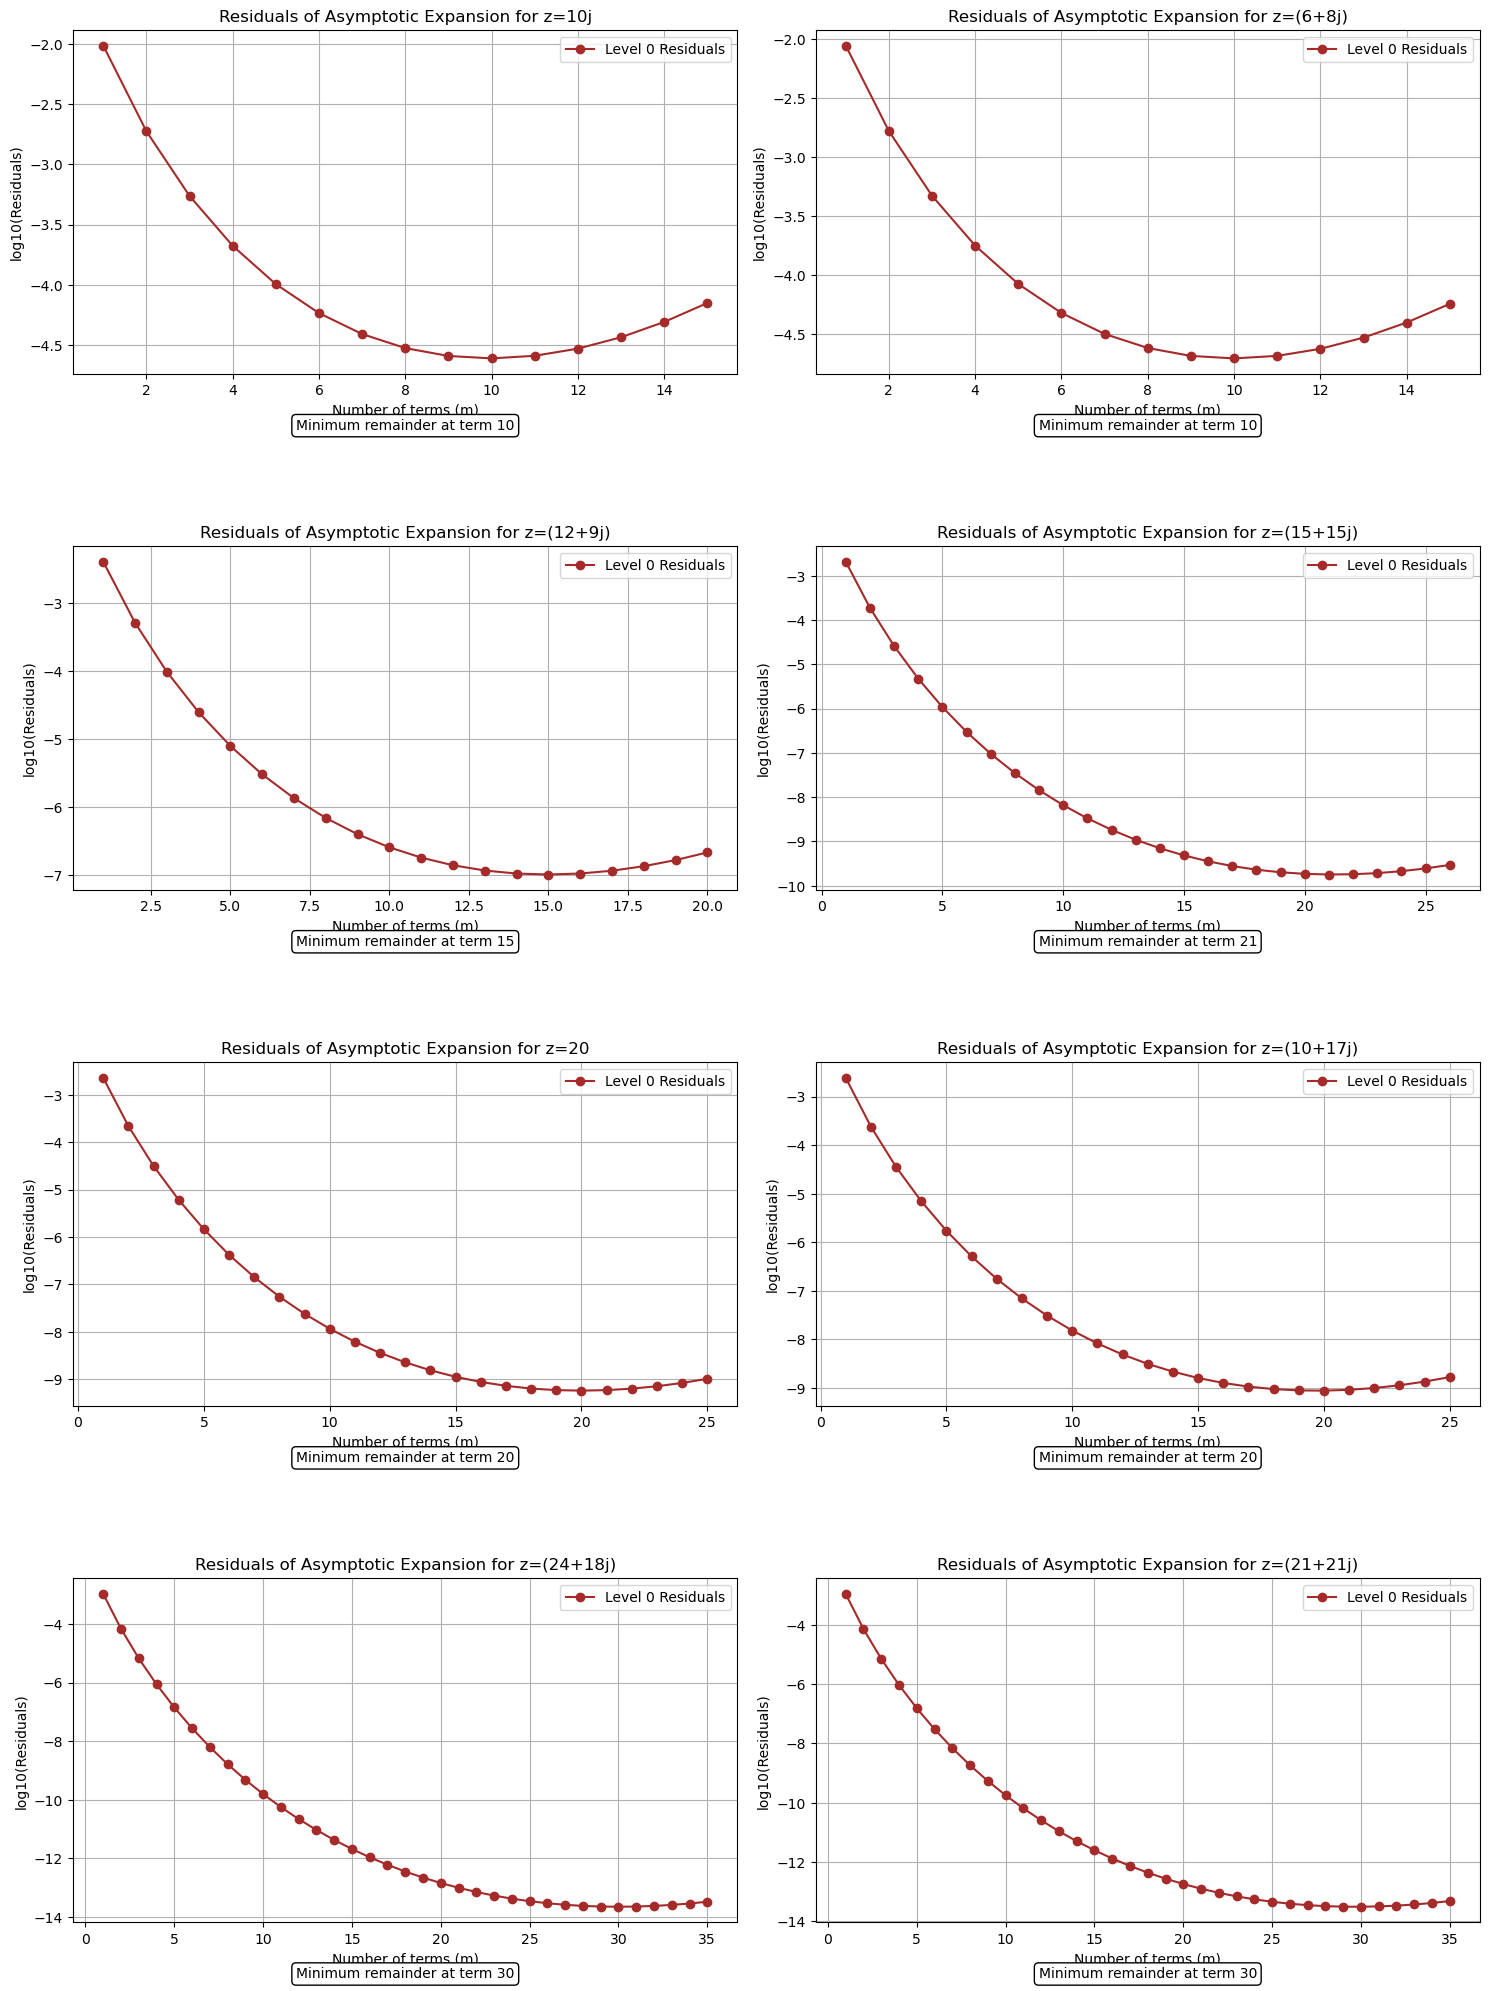

In [17]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import math

# 定义函数 f(z) 的实部和虚部
def integrand_real(tau, r, theta):
    return np.exp(-r * tau) * (tau + np.cos(theta)) / (1 + 2 * tau * np.cos(theta) + tau**2)

def integrand_imag(tau, r, theta):
    return np.exp(-r * tau) * np.sin(theta) / (1 + 2 * tau * np.cos(theta) + tau**2)

def compute_integral(z):
    r = np.abs(z)
    theta = np.angle(z)
    
    real_part, _ = quad(integrand_real, 0, np.inf, args=(r, theta))
    imag_part, _ = quad(integrand_imag, 0, np.inf, args=(r, theta))
    
    return real_part - 1j * imag_part

# 计算 level0 近似
def level0_approximation(z, N):
    return sum([((-1)**n * math.factorial(n) / z**(n + 1)) for n in range(N)])

# 参数设置
z_values = [10j, 6 + 8j, 12 + 9j, 15 + 15j, 20, 10 + 17j, 24 + 18j, 21 + 21j]
# z_values = [10j, 10 + 10j, 20j, 20 + 20j, 30, 30 + 30j, 40, 40 + 40j]

# 设置子图
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for idx, z in enumerate(z_values):
    N = round(np.abs(z)) + 5  # 根据 |z| + 5 来计算 N
    M_max = 3 * N

    actual_value = compute_integral(z)
    level0_values = [level0_approximation(z, n) for n in range(1, N + 1)]


    # # 调试信息打印
    # print(f'z = {z}, actual_value = {actual_value}')
    # for n, lv in enumerate(level0_values, 1):
    #     print(f'N = {n}, level0_value = {lv}, residual = {np.log10(abs(actual_value - lv))}')

  
    level0_residuals = [np.log10(abs(actual_value - lv)) for lv in level0_values]
   
    min_remainder_term = np.argmin(level0_residuals) + 1

    # 绘制结果
    axes[idx].plot(range(1, N + 1), level0_residuals, 'ro-', label='Level 0 Residuals', color='brown')

    axes[idx].set_xlabel('Number of terms (m)')
    axes[idx].set_ylabel('log10(Residuals)')
    axes[idx].set_title(f'Residuals of Asymptotic Expansion for z={z}')
    axes[idx].grid(True)
    axes[idx].legend()

    # 添加注释显示最小残差对应的 M 值
    axes[idx].annotate(f'Minimum remainder at term {min_remainder_term}',
                       xy=(0.5, -0.15), xycoords='axes fraction',
                       ha='center', va='center', fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


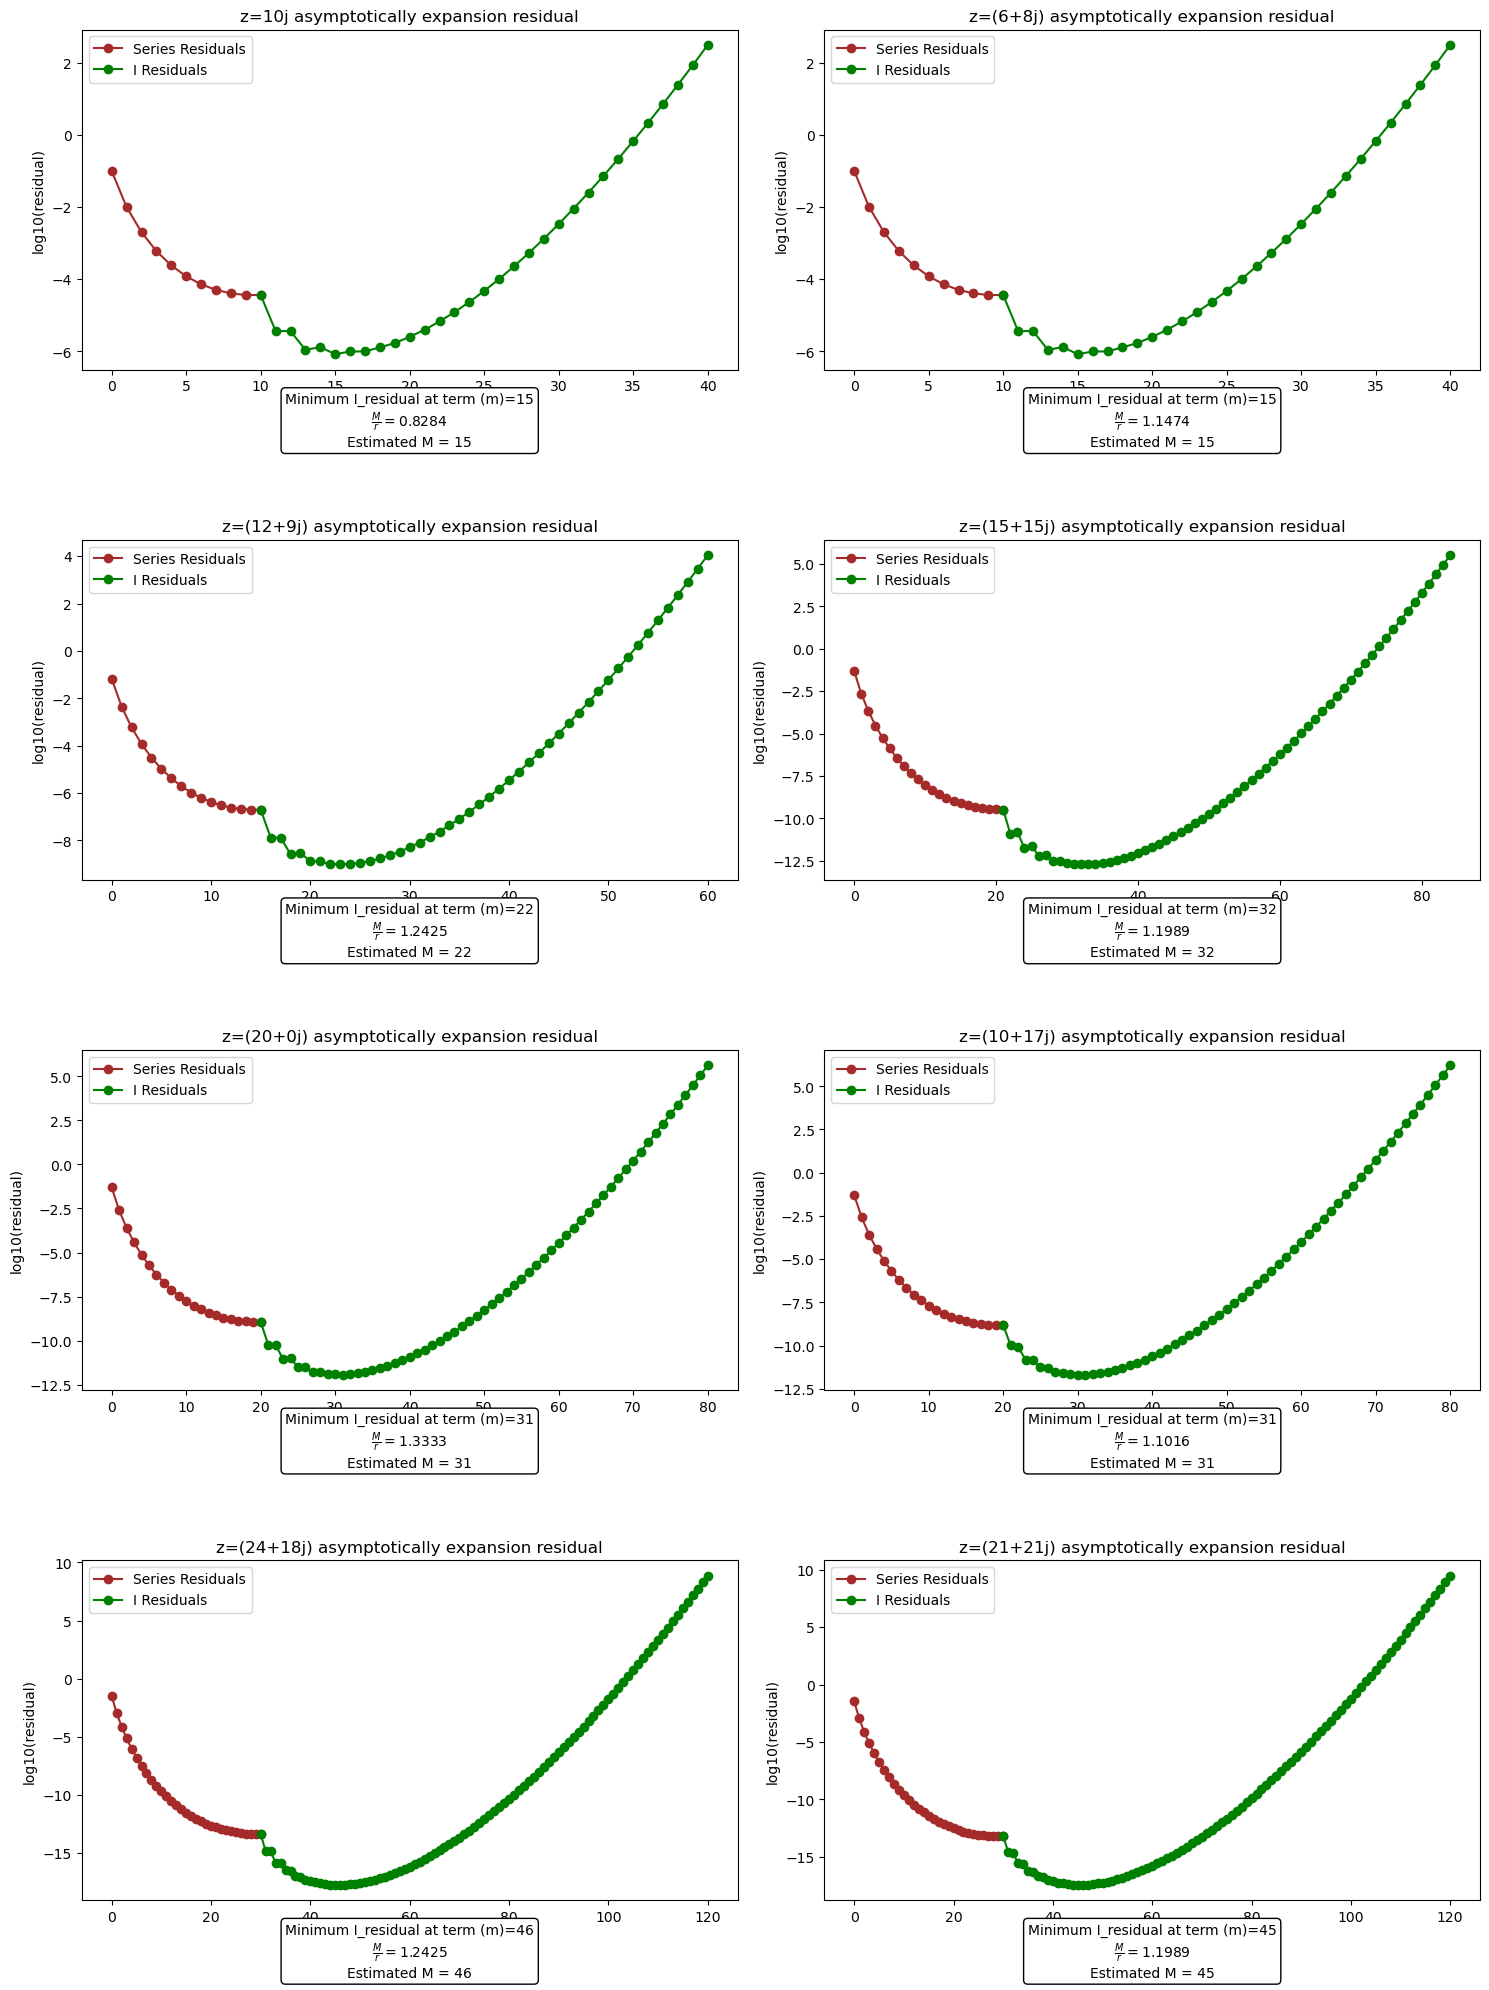

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath  # 用于处理复数运算

# 定义复数 z 的初始项
def I_0(z, N):
    r = abs(z)
    return math.factorial(N) / r**(N + 1)

def I_1(z, N):
    r = abs(z)
    return math.factorial(N) / r**(N + 1) - math.factorial(N + 1) / r**(N + 2)

# 适应复数的递归函数
def I_m_recurrent(z, m, N, I_prev, I_prev_prev):
    r = abs(z)
    return ((r - m - N + 1) * I_prev + m * I_prev_prev) / r

# 复数 z 值
z_values = [10j, 6 + 8j, 12 + 9j, 15 + 15j, 20 + 0j, 10 + 17j, 24 + 18j, 21 + 21j]

# 设置子图
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for idx, z in enumerate(z_values):
    N = round(abs(z))
    M_max = 3 * N  # 设置最大项数
    
    # 初始化数组存储结果
    I_values = np.zeros(M_max + 1, dtype=complex)

    # 计算 I[0] 和 I[1]
    I_values[0] = I_0(z, N)
    I_values[1] = I_1(z, N)

    # 使用递归关系计算 I[m]
    for m in range(1, M_max):
        I_values[m + 1] = I_m_recurrent(z, m, N, I_values[m], I_values[m - 1])

    # 计算级数项和 I 展开的对数残差
    series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
    I_residuals = [np.log10(abs(i)) for i in I_values]

    # 找到最小残差的 M 值
    min_M = np.argmin(I_residuals)  # 注意这里的 min_M 是从0开始计数的
    
    # 计算 M/r 的值
    theta = cmath.phase(z)
    e_i_theta = cmath.exp(1j * theta)
    M_over_r = (abs(e_i_theta + 1)**2) / (1 + abs(e_i_theta + 1))

    # 计算 M 的预估值
    estimated_M = min_M + N

    # 绘制结果
    axes[idx].plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals')
    axes[idx].plot(range(N, N + M_max + 1), I_residuals, 'o-', color='green', label='I Residuals')
    
    axes[idx].set_xlabel('term (m)')
    axes[idx].set_ylabel('log10(residual)')
    axes[idx].set_title(f'z={z} asymptotically expansion residual')
    axes[idx].legend()

    # 在图中注释最低点对应的项数（term）和 M/r 及 M 的估计值
    annotation_text = (f'Minimum I_residual at term (m)={min_M + N}\n'
                       f'$\\frac{{M}}{{r}} = {M_over_r:.4f}$\n'
                       f'Estimated M = {estimated_M}')
    axes[idx].annotate(annotation_text, 
                       xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


# Confluent Hypergeometric Function

## Real Case

In [8]:
import numpy as np
import scipy.special as sc

a, b, x = 1.1, 1.456, 20.1
sc.hyperu(a, b, x)

0.035653807496174646

In [9]:
import mpmath

# 设置精度到小数点后20位
mpmath.mp.dps = 20

# 定义参数
a, b, x = 1.1, 1.456, 20.1

# 使用mpmath计算Kummer U函数
result = mpmath.hyperu(a, b, x)

print(f"Kummer U({a}, {b}, {x}) = {result}")

Kummer U(1.1, 1.456, 20.1) = 0.035653783994321187377


In [10]:
import numpy as np
from scipy.special import gamma, poch
from scipy.special import comb  # For binomial coefficients

def calculate_P_m(a, b, z, N, m):
    P_m = 0
    # Pre-calculate common factors
    common_factor = gamma(a + b - 1) / gamma(b - a)
    for k in range(m + 1):
        binom_coeff = comb(m, k)  # Binomial coefficient C(m, k)
        factor = (-1)**k * (1 / 2)**m / z**(N + a + k)
        poch_a = poch(a, N + k)  # (a)_{N+k}
        poch_ab = poch(a - b + 1, N + k)  # (a-b+1)_{N+k}
        term = factor * binom_coeff * poch_a * poch_ab / gamma(N + k + 1)
        P_m += term
        
    P_m *= -common_factor
    return P_m

# Example usage:
# a = 2.0
# b = 3.5
# z = 10
# N = 5
# m = 3

a = 1.1
b = 1.456
z = 20.1
N = 20
m = 3
P_m_value = calculate_P_m(a, b, z, N, m)
print(f"P_{m} = {P_m_value}")

P_3 = 1.2064858559695828e-13


Maple: 

add((1/2)^(m+1)*add(binomial(m,k)*(-1)^k/z^(N+a+k)*pochhammer(a, N+k)*pochhammer(a,N+k)*pochhammer(a-b+1,N+k)/(N+k)!,k=0..m),m=0..M-1)

## level 0 approximation

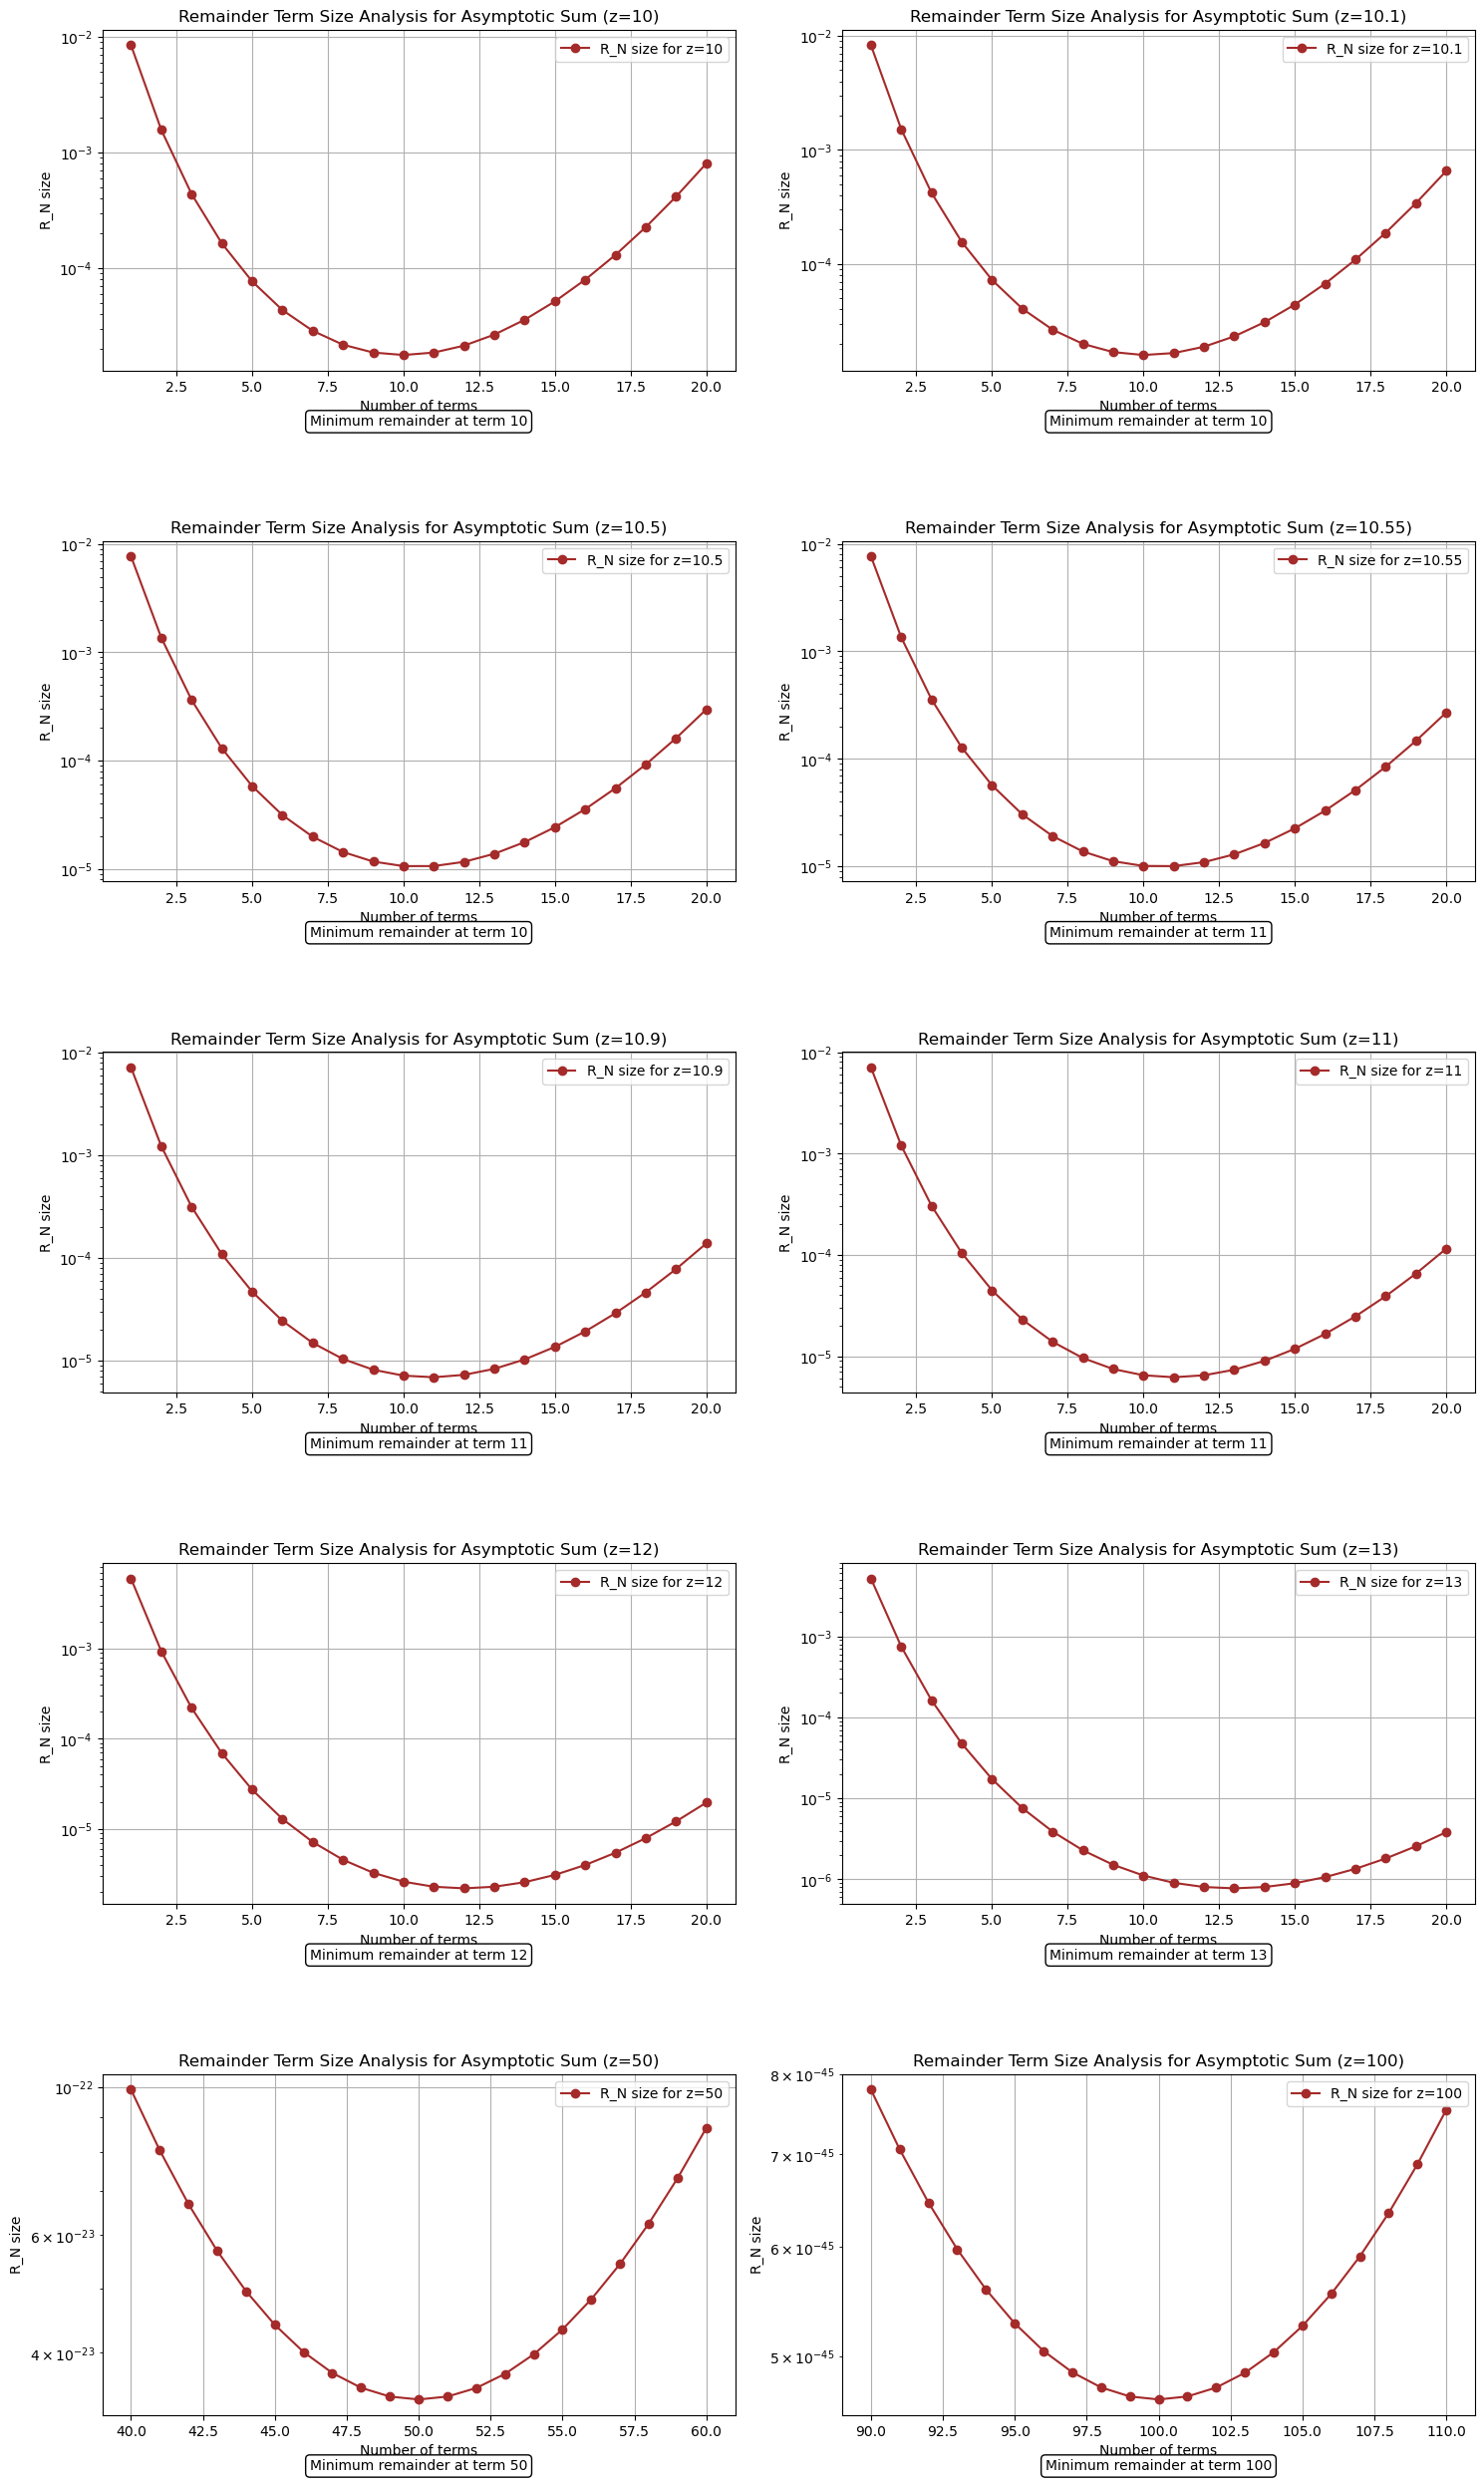

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import poch, gamma

def asymptotic_sum(a, b, z, num_terms):
    sum_value = 0
    z_power = z ** (-a)
    for s in range(num_terms):
        term = poch(a, s) * poch(a - b + 1, s) / (gamma(s + 1) * z ** s)
        sum_value += term
    return z_power * sum_value

def remainder_term(a, b, z, N):
    def integrand(t):
        return (t ** (N + a - 1) * np.exp(-z * t)) / (1 + t)
    R_N, _ = quad(integrand, 0, np.inf)
    return (-1) ** N * R_N 

# Example parameters
a = 2.0
b = 2.0
z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 50, 100]
terms_ranges = {
    10: range(1, 21),
    10.10: range(1, 21),
    10.50: range(1, 21),
    10.55: range(1, 21),
    10.90: range(1, 21),
    11: range(1, 21),
    12: range(1, 21),
    13: range(1, 21),
    50: range(40, 61),
    100: range(90, 111)
}

# Set up subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()

for idx, z_value in enumerate(z_values):
    terms = terms_ranges[z_value]
    remainder_results = []
    
    for num_terms in terms:
        R_N_value = remainder_term(a, b, z_value, num_terms)
        remainder_results.append((num_terms, abs(R_N_value)))
    
    terms_list, remainder_sizes = zip(*remainder_results)
    
    # Find the term with the minimum remainder
    min_remainder_term = terms_list[np.argmin(remainder_sizes)]
    min_remainder_value = min(remainder_sizes)
    
    # Plot the remainder size for each z value
    axes[idx].plot(terms_list, remainder_sizes, marker='o', color='brown', label=f'R_N size for z={z_value}')
    axes[idx].set_xlabel('Number of terms')
    axes[idx].set_ylabel('R_N size')
    axes[idx].set_title(f'Remainder Term Size Analysis for Asymptotic Sum (z={z_value})')
    axes[idx].set_yscale('log')
    axes[idx].grid(True)
    
    # Add annotation showing the term with the minimum remainder
    axes[idx].annotate(f'Minimum remainder at term {min_remainder_term}', 
                       xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    
    axes[idx].legend()

# Remove unused subplots
for i in range(len(z_values), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [6]:
import mpmath
from mpmath import mp

# 设置精度
mp.dps = 50

# 定义参数
a = mp.mpf(2.0)
b = mp.mpf(2.0)
z = mp.mpf(20.0)
N = 20
M = 10

# 定义Kummer U函数
def KummerU(a, b, z):
    return mpmath.hyperu(a, b, z)

# 定义I_{n,M}
def I_n_M(a, b, z, N, n, M):
    result = mp.mpf(0)
    for k in range(0, M + 1):
        binom_coeff = mpmath.binomial(M, k)
        term = binom_coeff * (-1)**k / z**(N + a + n + k)
        poch_a = mpmath.rf(a, N + n + k)  # (a)_{N+n+k}
        poch_ab = mpmath.rf(a - b + 1, N + n + k)  # (a-b+1)_{N+n+k}
        result += term * poch_a * poch_ab / mpmath.fac(N + n + k)
    return result

# 计算R_{N,M}
def R_N_M(a, b, z, N, M):
    sum_result = mp.mpf(0)
    for n in range(0, 100):  # 选择足够大的上限，确保精度
        I_nM_val = I_n_M(a, b, z, N, n, M)
        sum_result += (-1)**n * I_nM_val
    return (-1)**N / (2**M) * sum_result

# 计算残差
residual = R_N_M(a, b, z, N, M)
print(f"Residual R_{N,M}: {residual}")


Residual R_(20, 10): -581091434202917326788942340629333481144060072.88358


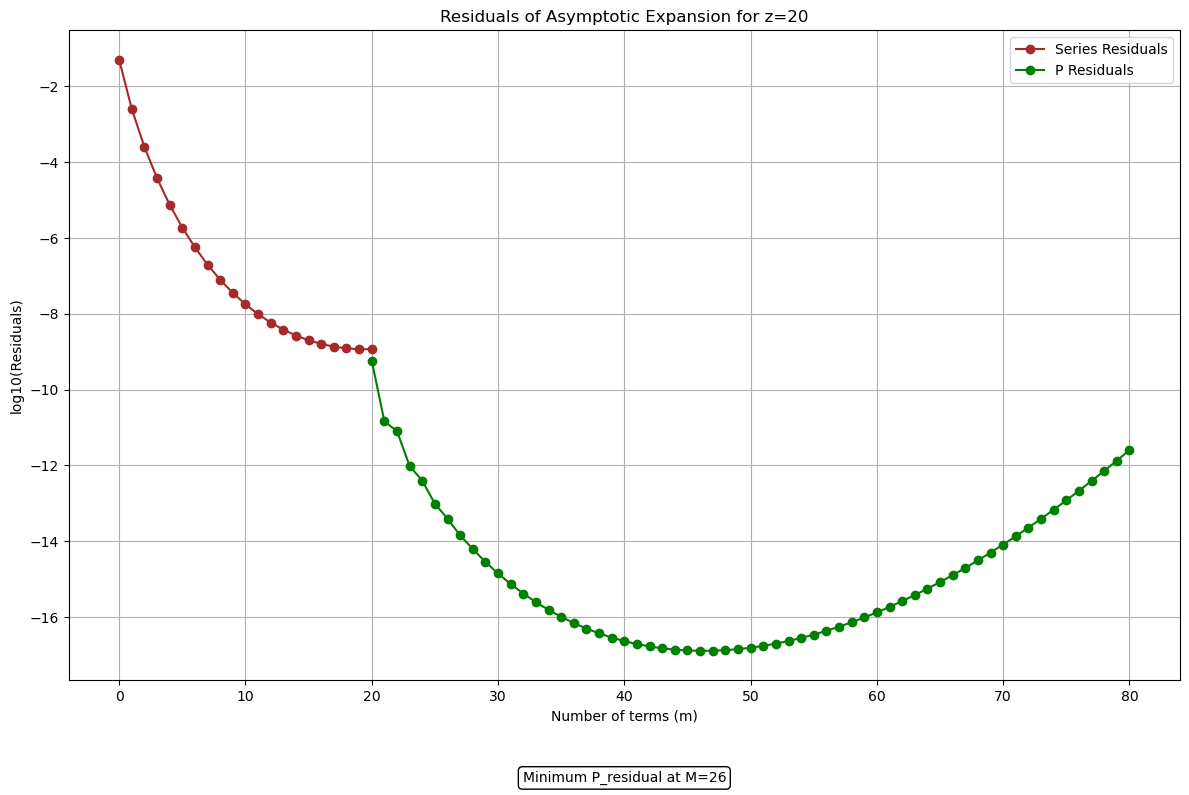

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# 设置 mpmath 精度
mpmath.mp.dps = 50

# 定义 P_m 函数
def P_m(z, m, N, a, b):
    result = mpmath.mpf(0)
    for k in range(m + 1):
        binom_coeff = mpmath.binomial(m, k)
        term = binom_coeff * (-1)**k / z**(N + a + k)
        poch_a = mpmath.rf(a, N + k)  # (a)_{N+k}
        poch_ab = mpmath.rf(a - b + 1, N + k)  # (a-b+1)_{N+k}
        result += term * poch_a * poch_ab / mpmath.fac(N + k)
    return (-1)**(m + 1) * (1/2)**(m + 1) * result

# 定义 R_{N,M} 函数
def R_N_M(z, N, M, a, b):
    sum_result = mpmath.mpf(0)
    for n in range(0, 50):  # 降低上限以避免溢出
        for k in range(M + 1):
            binom_coeff = mpmath.binomial(M, k)
            term = binom_coeff * (-1)**(n + k) / z**(N + a + n + k)
            poch_a = mpmath.rf(a, N + n + k)  # (a)_{N+n+k}
            poch_ab = mpmath.rf(a - b + 1, N + n + k)  # (a-b+1)_{N+n+k}
            sum_result += term * poch_a * poch_ab / mpmath.fac(N + n + k)
    return (-1)**N / (2**M) * sum_result

# Example parameters
a = 1.0
b = 1.0
z = 20

# 设置子图
fig, ax = plt.subplots(figsize=(12, 8))

N = round(z)
M_max = 3 * N  # 设定最大项数，以减少计算量

# 初始化数组存储结果
P_values = np.zeros(M_max + 1, dtype=float)

# 计算 P_m 值
for m in range(M_max + 1):
    P_values[m] = float(P_m(z, m, N, a, b))

# 计算级数项的对数残差
series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
P_residuals = [mpmath.log10(abs(P_values[j])) for j in range(M_max + 1)]

# 找到 P_residuals 中的最小值及其对应的 M
min_P_residual = min(P_residuals)
min_M = P_residuals.index(min_P_residual)

# 绘制结果
ax.plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals')
ax.plot(range(N, N + M_max + 1), [float(val) for val in P_residuals], 'o-', color='green', label='P Residuals')

# ax.plot(range(min_P_residual, M_max + 1), [float(val) for val in P_residuals], 'o-', color='green', label='P Residuals')


# Level 1 residuals
R_NM_values = []

for m in range(min_M, min_M + 10):  # 从最低点开始计算10个term的Level 1 residual
    R_NM_value = R_N_M(z, m, M_max, a, b)
    R_NM_values.append((m, abs(R_NM_value)))

NM_terms_list, NM_remainder_sizes = zip(*R_NM_values)

ax.set_xlabel('Number of terms (m)')
ax.set_ylabel('log10(Residuals)')
ax.set_title(f'Residuals of Asymptotic Expansion for z={z}')
ax.grid(True)
ax.legend()

# 添加注释显示最小残差对应的 M 值
ax.annotate(f'Minimum P_residual at M={min_M}', 
            xy=(0.5, -0.15), xycoords='axes fraction', 
            ha='center', va='center', fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 调整子图布局
plt.tight_layout()
plt.show()


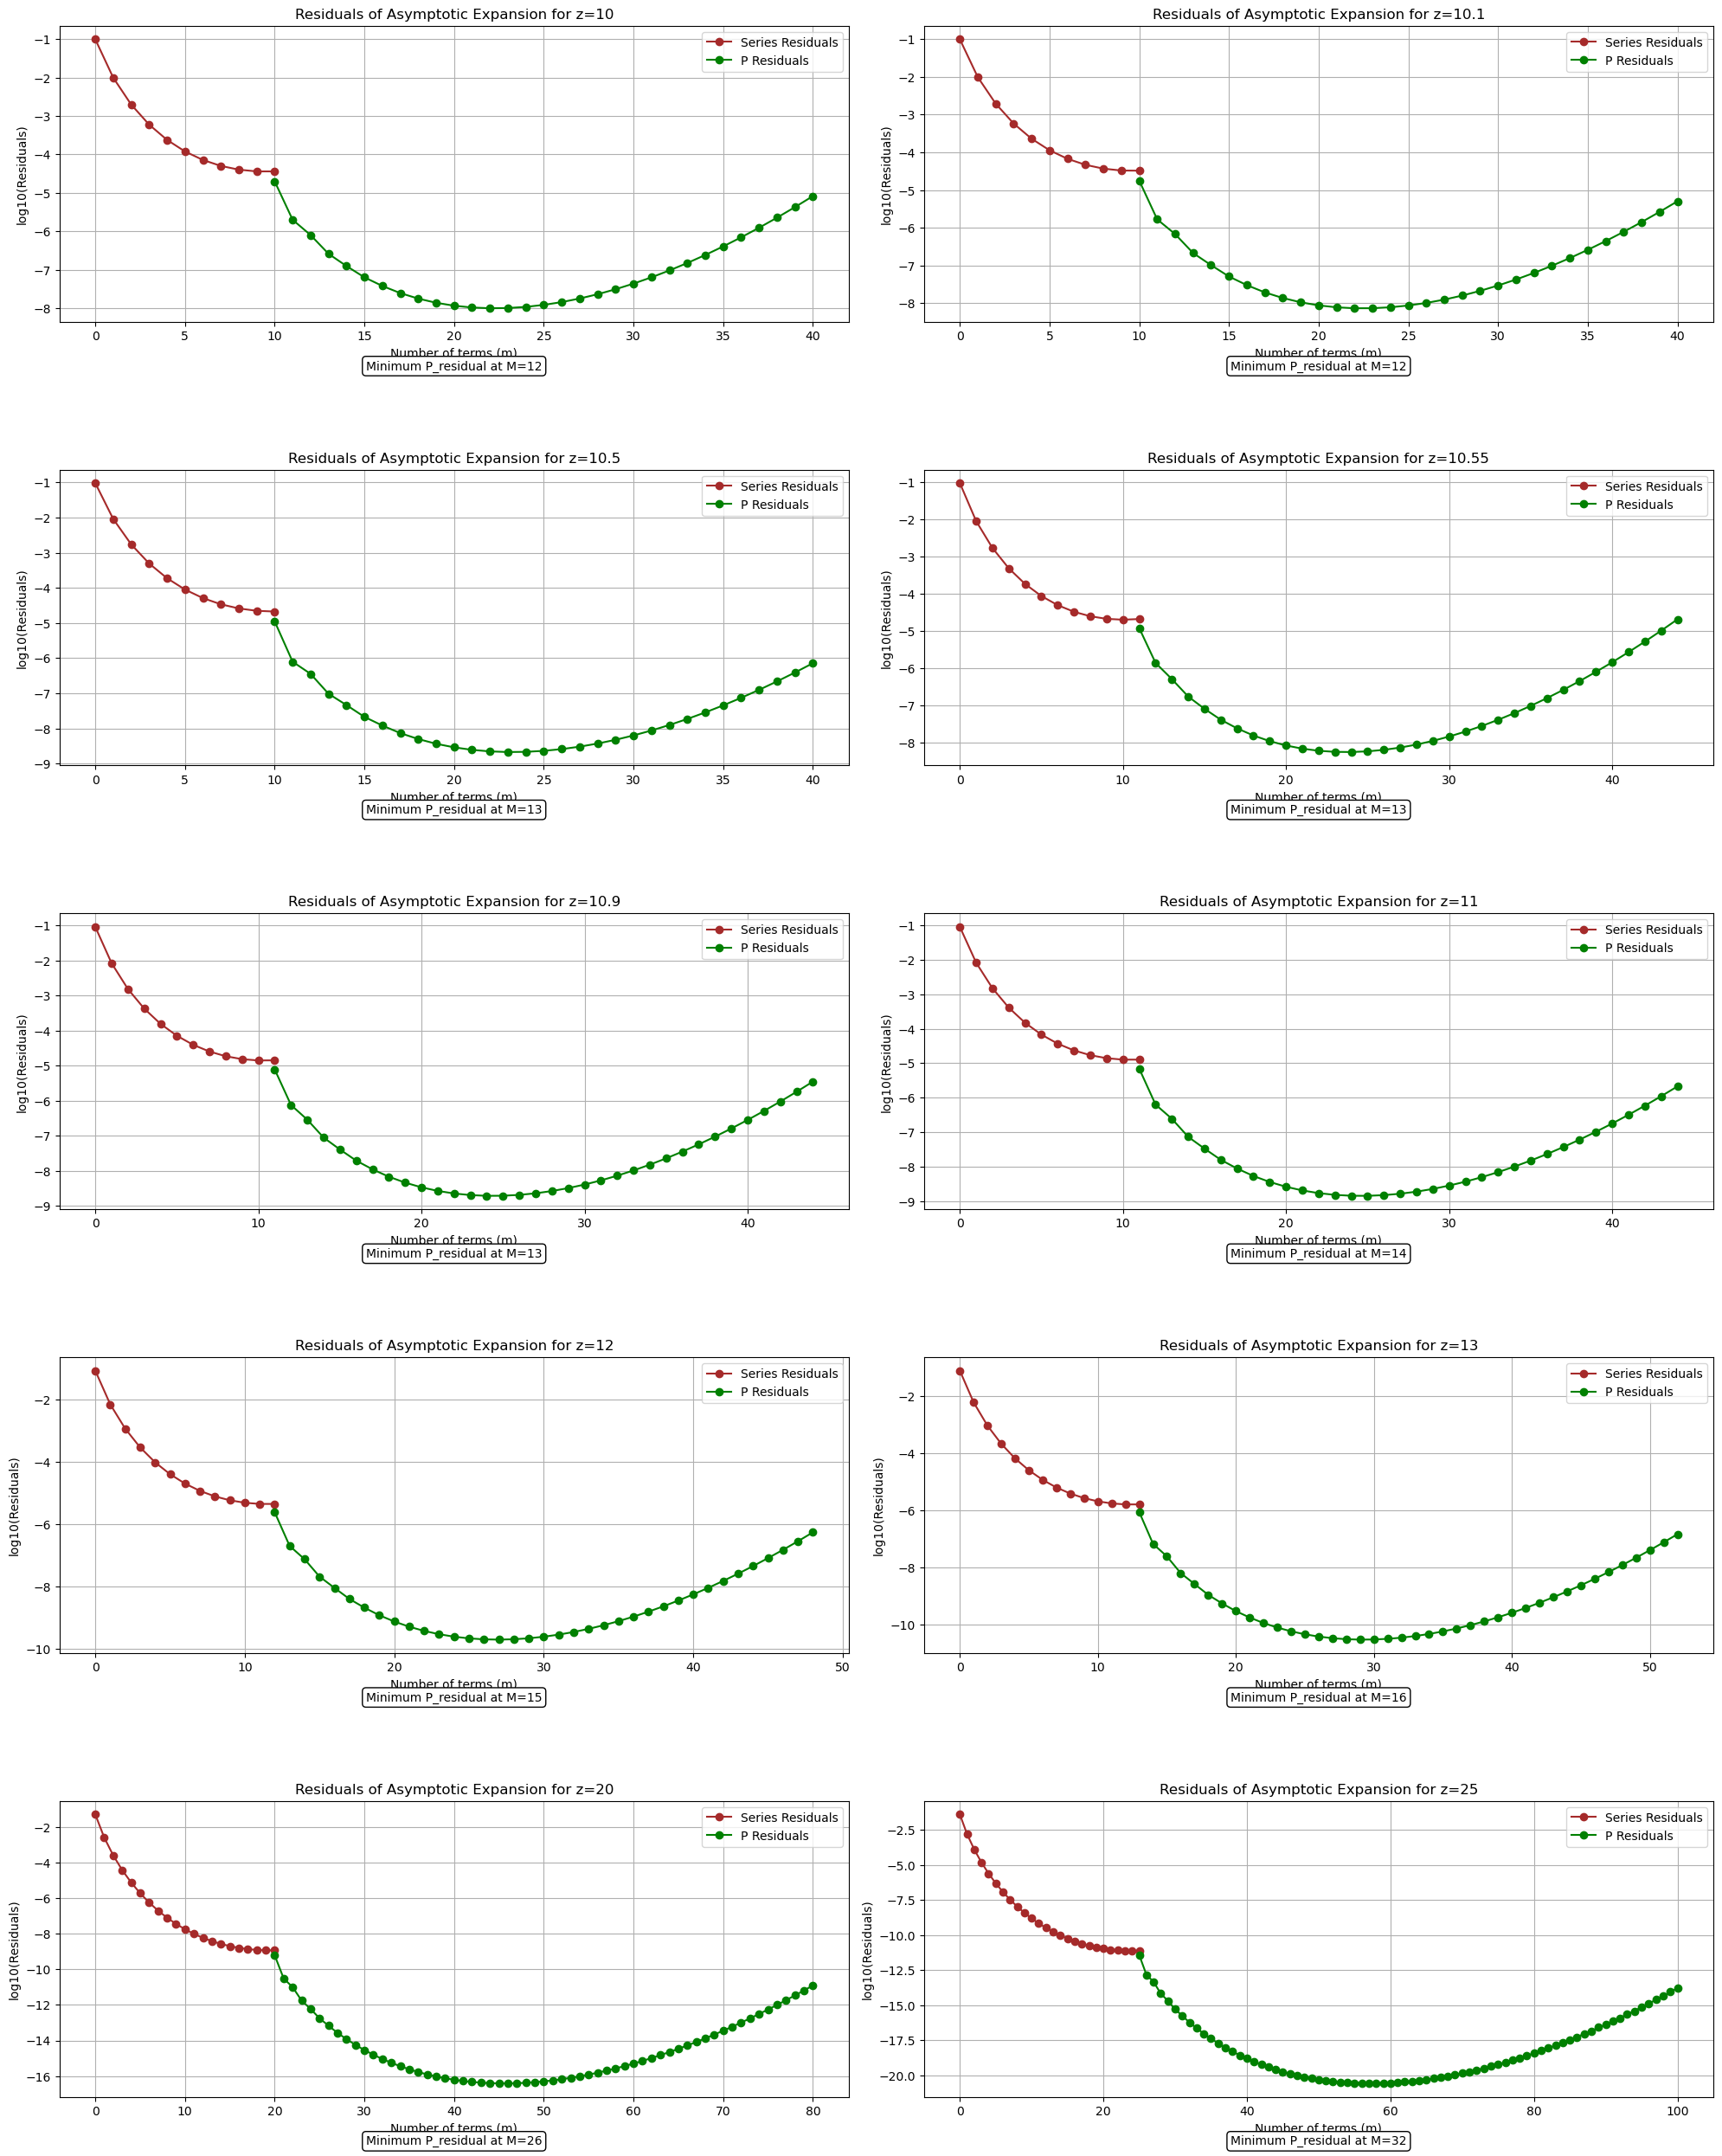

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# 设置 mpmath 精度
mpmath.mp.dps = 50

# 定义 P_m 函数
def P_m(z, m, N, a, b):
    result = mpmath.mpf(0)
    for k in range(m + 1):
        binom_coeff = mpmath.binomial(m, k)
        term = binom_coeff * (-1)**k / z**(N + a + k)
        poch_a = mpmath.rf(a, N + k)  # (a)_{N+k}
        poch_ab = mpmath.rf(a - b + 1, N + k)  # (a-b+1)_{N+k}
        result += term * poch_a * poch_ab / mpmath.fac(N + k)
    return (-1)**(m + 1) * (1/2)**(m + 1) * result

# 定义 R_{N,M} 函数
def R_N_M(z, N, M, a, b):
    sum_result = mpmath.mpf(0)
    for n in range(0, 50):  # 降低上限以避免溢出
        for k in range(M + 1):
            binom_coeff = mpmath.binomial(M, k)
            term = binom_coeff * (-1)**(n + k) / z**(N + a + n + k)
            poch_a = mpmath.rf(a, N + n + k)  # (a)_{N+n+k}
            poch_ab = mpmath.rf(a - b + 1, N + n + k)  # (a-b+1)_{N+n+k}
            sum_result += term * poch_a * poch_ab / mpmath.fac(N + n + k)
    return (-1)**N / (2**M) * sum_result

# Example parameters
a = 2.0
b = 2.0
z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 20, 25]

# 创建包含多个子图的布局
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()  # 将子图数组展平以便于索引

for idx, z in enumerate(z_values):
    N = round(z)
    M_max = 3 * N  # 设定最大项数，以减少计算量

    # 初始化数组存储结果
    P_values = np.zeros(M_max + 1, dtype=float)

    # 计算 P_m 值
    for m in range(M_max + 1):
        P_values[m] = float(P_m(z, m, N, a, b))

    # 计算级数项的对数残差
    series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
    P_residuals = [mpmath.log10(abs(P_values[j])) for j in range(M_max + 1)]

    # 找到 P_residuals 中的最小值及其对应的 M
    min_P_residual = min(P_residuals)
    min_M = P_residuals.index(min_P_residual)

    # 绘制结果
    ax = axes[idx]
    ax.plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals')
    ax.plot(range(N, N + M_max + 1), [float(val) for val in P_residuals], 'o-', color='green', label='P Residuals')

    # Level 1 residuals
    R_NM_values = []
    for m in range(min_M, min_M + 10):  # 从最低点开始计算10个term的Level 1 residual
        R_NM_value = R_N_M(z, m, M_max, a, b)
        R_NM_values.append((m, abs(R_NM_value)))
    
    NM_terms_list, NM_remainder_sizes = zip(*R_NM_values)

    ax.set_xlabel('Number of terms (m)')
    ax.set_ylabel('log10(Residuals)')
    ax.set_title(f'Residuals of Asymptotic Expansion for z={z}')
    ax.grid(True)
    ax.legend()

    # 添加注释显示最小残差对应的 M 值
    ax.annotate(f'Minimum P_residual at M={min_M}', 
                xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', va='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

## Complex Case

In [5]:
import scipy.integrate as integrate
from scipy.special import gamma
import numpy as np

def integrand(t, a, b, z):
    return np.exp(-z*t) * t**(a-1) * (1+t)**(b-a-1)

def U(a, b, z):
    result, _ = integrate.quad(lambda t: integrand(t, a, b, z), 0, np.inf)
    return result / gamma(a)

a = 2.5
b = 3.5
z = 1 + 2j  # 示例复数

result = U(a, b, z)
print(f"U({a}, {b}, {z}) = {result}")

U(2.5, 3.5, (1+2j)) = -0.12451615120187082


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


In [6]:
import mpmath

a = 2.5
b = 3.5
z = 1 + 2j  # 示例复数

result = mpmath.hyperu(a, b, z)
print(f"U({a}, {b}, {z}) = {result}")


U(2.5, 3.5, (1+2j)) = (-0.12451615120135684143132611400638659414334346060733 - 0.048829006850428145746082396166380521930585012420278j)


In [13]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gamma

def R(tau, theta):
    return np.sqrt(1 + 2 * tau * np.cos(theta) + tau**2)

def phi(tau, theta):
    return np.arctan2(-tau * np.sin(theta), 1 + tau * np.cos(theta))

def integrand_real(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.cos((b-a-1) * phi_val - a * theta)

def integrand_imag(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.sin((b-a-1) * phi_val - a * theta)

def U(a, b, z):
    r = np.abs(z)
    theta = np.angle(z)
    real_part, real_error = quad(integrand_real, 0, np.inf, args=(r, theta, a, b))
    imag_part, imag_error = quad(integrand_imag, 0, np.inf, args=(r, theta, a, b))
    normalization = 1 / gamma(a)
    return normalization * real_part, normalization * imag_part

# 示例参数
a = 1
b = 1
z = 10j+10

real_part, imag_part = U(a, b, z)
print(f"real part: {real_part}, imag part: {imag_part}")


real part: 0.04962239109595107, imag part: -0.045481068348968715


之前的复数代码

z = 10j, actual_value = (0.00948853901635491-0.09819103501016999j)
N = 1, level0_value = -0.1j, residual = -2.0150481767456268
N = 2, level0_value = (0.010000000000000002-0.1j), residual = -2.7258700041738932
N = 3, level0_value = (0.010000000000000002-0.098j), residual = -3.262828691020944
N = 4, level0_value = (0.0094-0.098j), residual = -3.67663383121271
N = 5, level0_value = (0.0094-0.09824j), residual = -3.994919425603297
N = 6, level0_value = (0.00952-0.09824j), residual = -4.23506908406194
N = 7, level0_value = (0.00952-0.09816799999999999j), residual = -4.409020328937319
N = 8, level0_value = (0.009469600000000002-0.09816799999999999j), residual = -4.525476333890416
N = 9, level0_value = (0.009469600000000002-0.09820832j), residual = -4.591066252495256
N = 10, level0_value = (0.009505888-0.09820832j), residual = -4.6110119364769675
N = 11, level0_value = (0.009505888-0.098172032j), residual = -4.589537671788584
N = 12, level0_value = (0.0094659712-0.098172032j), residual = -4.5

C:\Users\38982\AppData\Local\Temp\ipykernel_10976\2755108717.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axes[idx].plot(range(1, N + 1), level0_residuals, 'ro-', label='Level 0 Residuals', color='brown')


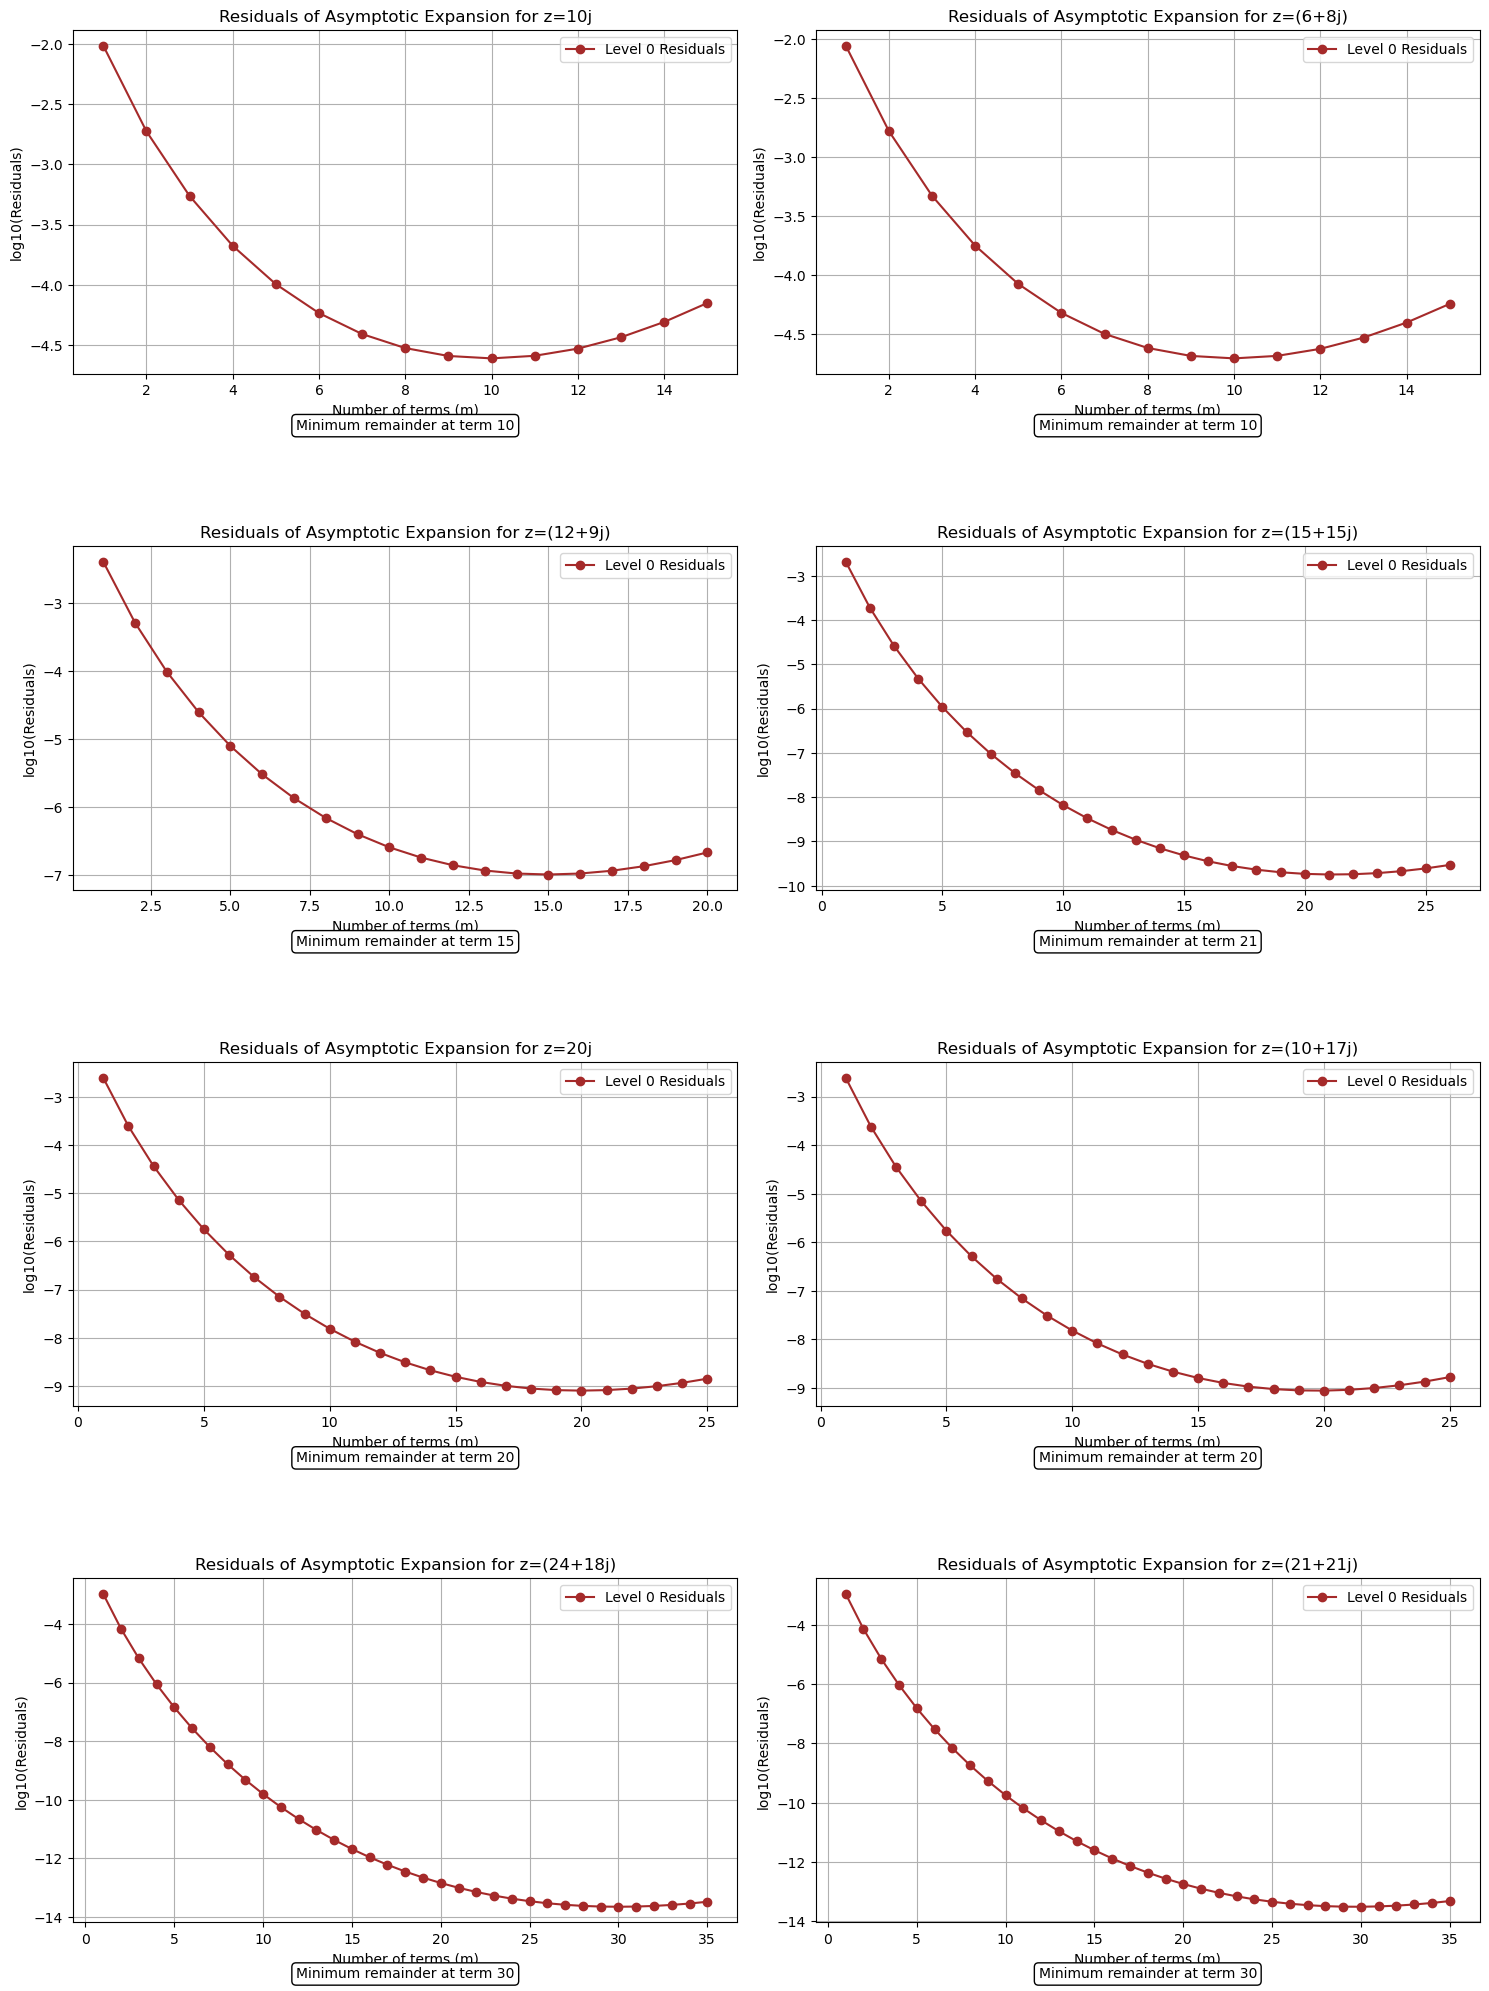

In [45]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gamma
import matplotlib.pyplot as plt

# 定义U函数的实部和虚部积分核
def R(tau, theta):
    return np.sqrt(1 + 2 * tau * np.cos(theta) + tau**2)

def phi(tau, theta):
    return np.arctan2(-tau * np.sin(theta), 1 + tau * np.cos(theta))

def integrand_real(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.cos((b-a-1) * phi_val - a * theta)

def integrand_imag(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.sin((b-a-1) * phi_val - a * theta)

def U(a, b, z):
    r = np.abs(z)
    theta = np.angle(z)
    real_part, real_error = quad(integrand_real, 0, np.inf, args=(r, theta, a, b))
    imag_part, imag_error = quad(integrand_imag, 0, np.inf, args=(r, theta, a, b))
    normalization = 1 / gamma(a)
    return normalization * (real_part + 1j * imag_part)

# 定义渐近和
def asymptotic_sum(a, b, z, num_terms):
    sum_value = 0
    z_power = z ** (-a)
    for n in range(num_terms):
        term = (-1)**n * gamma(a + n) * gamma(a - b + 1 + n) / (gamma(n + 1) * z**n)
        sum_value += term
    return z_power * sum_value

# 参数设置
a = 1.0
b = 1.0
z_values = [10j, 6 + 8j, 12 + 9j, 15 + 15j, 20j, 10 + 17j, 24 + 18j, 21 + 21j]

# 设置子图
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for idx, z in enumerate(z_values):
    N = round(np.abs(z)) + 5  # 根据 |z| + 5 来计算 N

    actual_value = U(a, b, z)
    level0_values = [asymptotic_sum(a, b, z, n) for n in range(1, N + 1)]

    # 调试信息打印
    print(f'z = {z}, actual_value = {actual_value}')
    for n, lv in enumerate(level0_values, 1):
        print(f'N = {n}, level0_value = {lv}, residual = {np.log10(abs(actual_value - lv))}')

    level0_residuals = [np.log10(abs(actual_value - lv)) for lv in level0_values]
   
    min_remainder_term = np.argmin(level0_residuals) + 1

    # 绘制结果
    axes[idx].plot(range(1, N + 1), level0_residuals, 'ro-', label='Level 0 Residuals', color='brown')

    axes[idx].set_xlabel('Number of terms (m)')
    axes[idx].set_ylabel('log10(Residuals)')
    axes[idx].set_title(f'Residuals of Asymptotic Expansion for z={z}')
    axes[idx].grid(True)
    axes[idx].legend()

    # 添加注释显示最小残差对应的 M 值
    axes[idx].annotate(f'Minimum remainder at term {min_remainder_term}',
                       xy=(0.5, -0.15), xycoords='axes fraction',
                       ha='center', va='center', fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))


# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


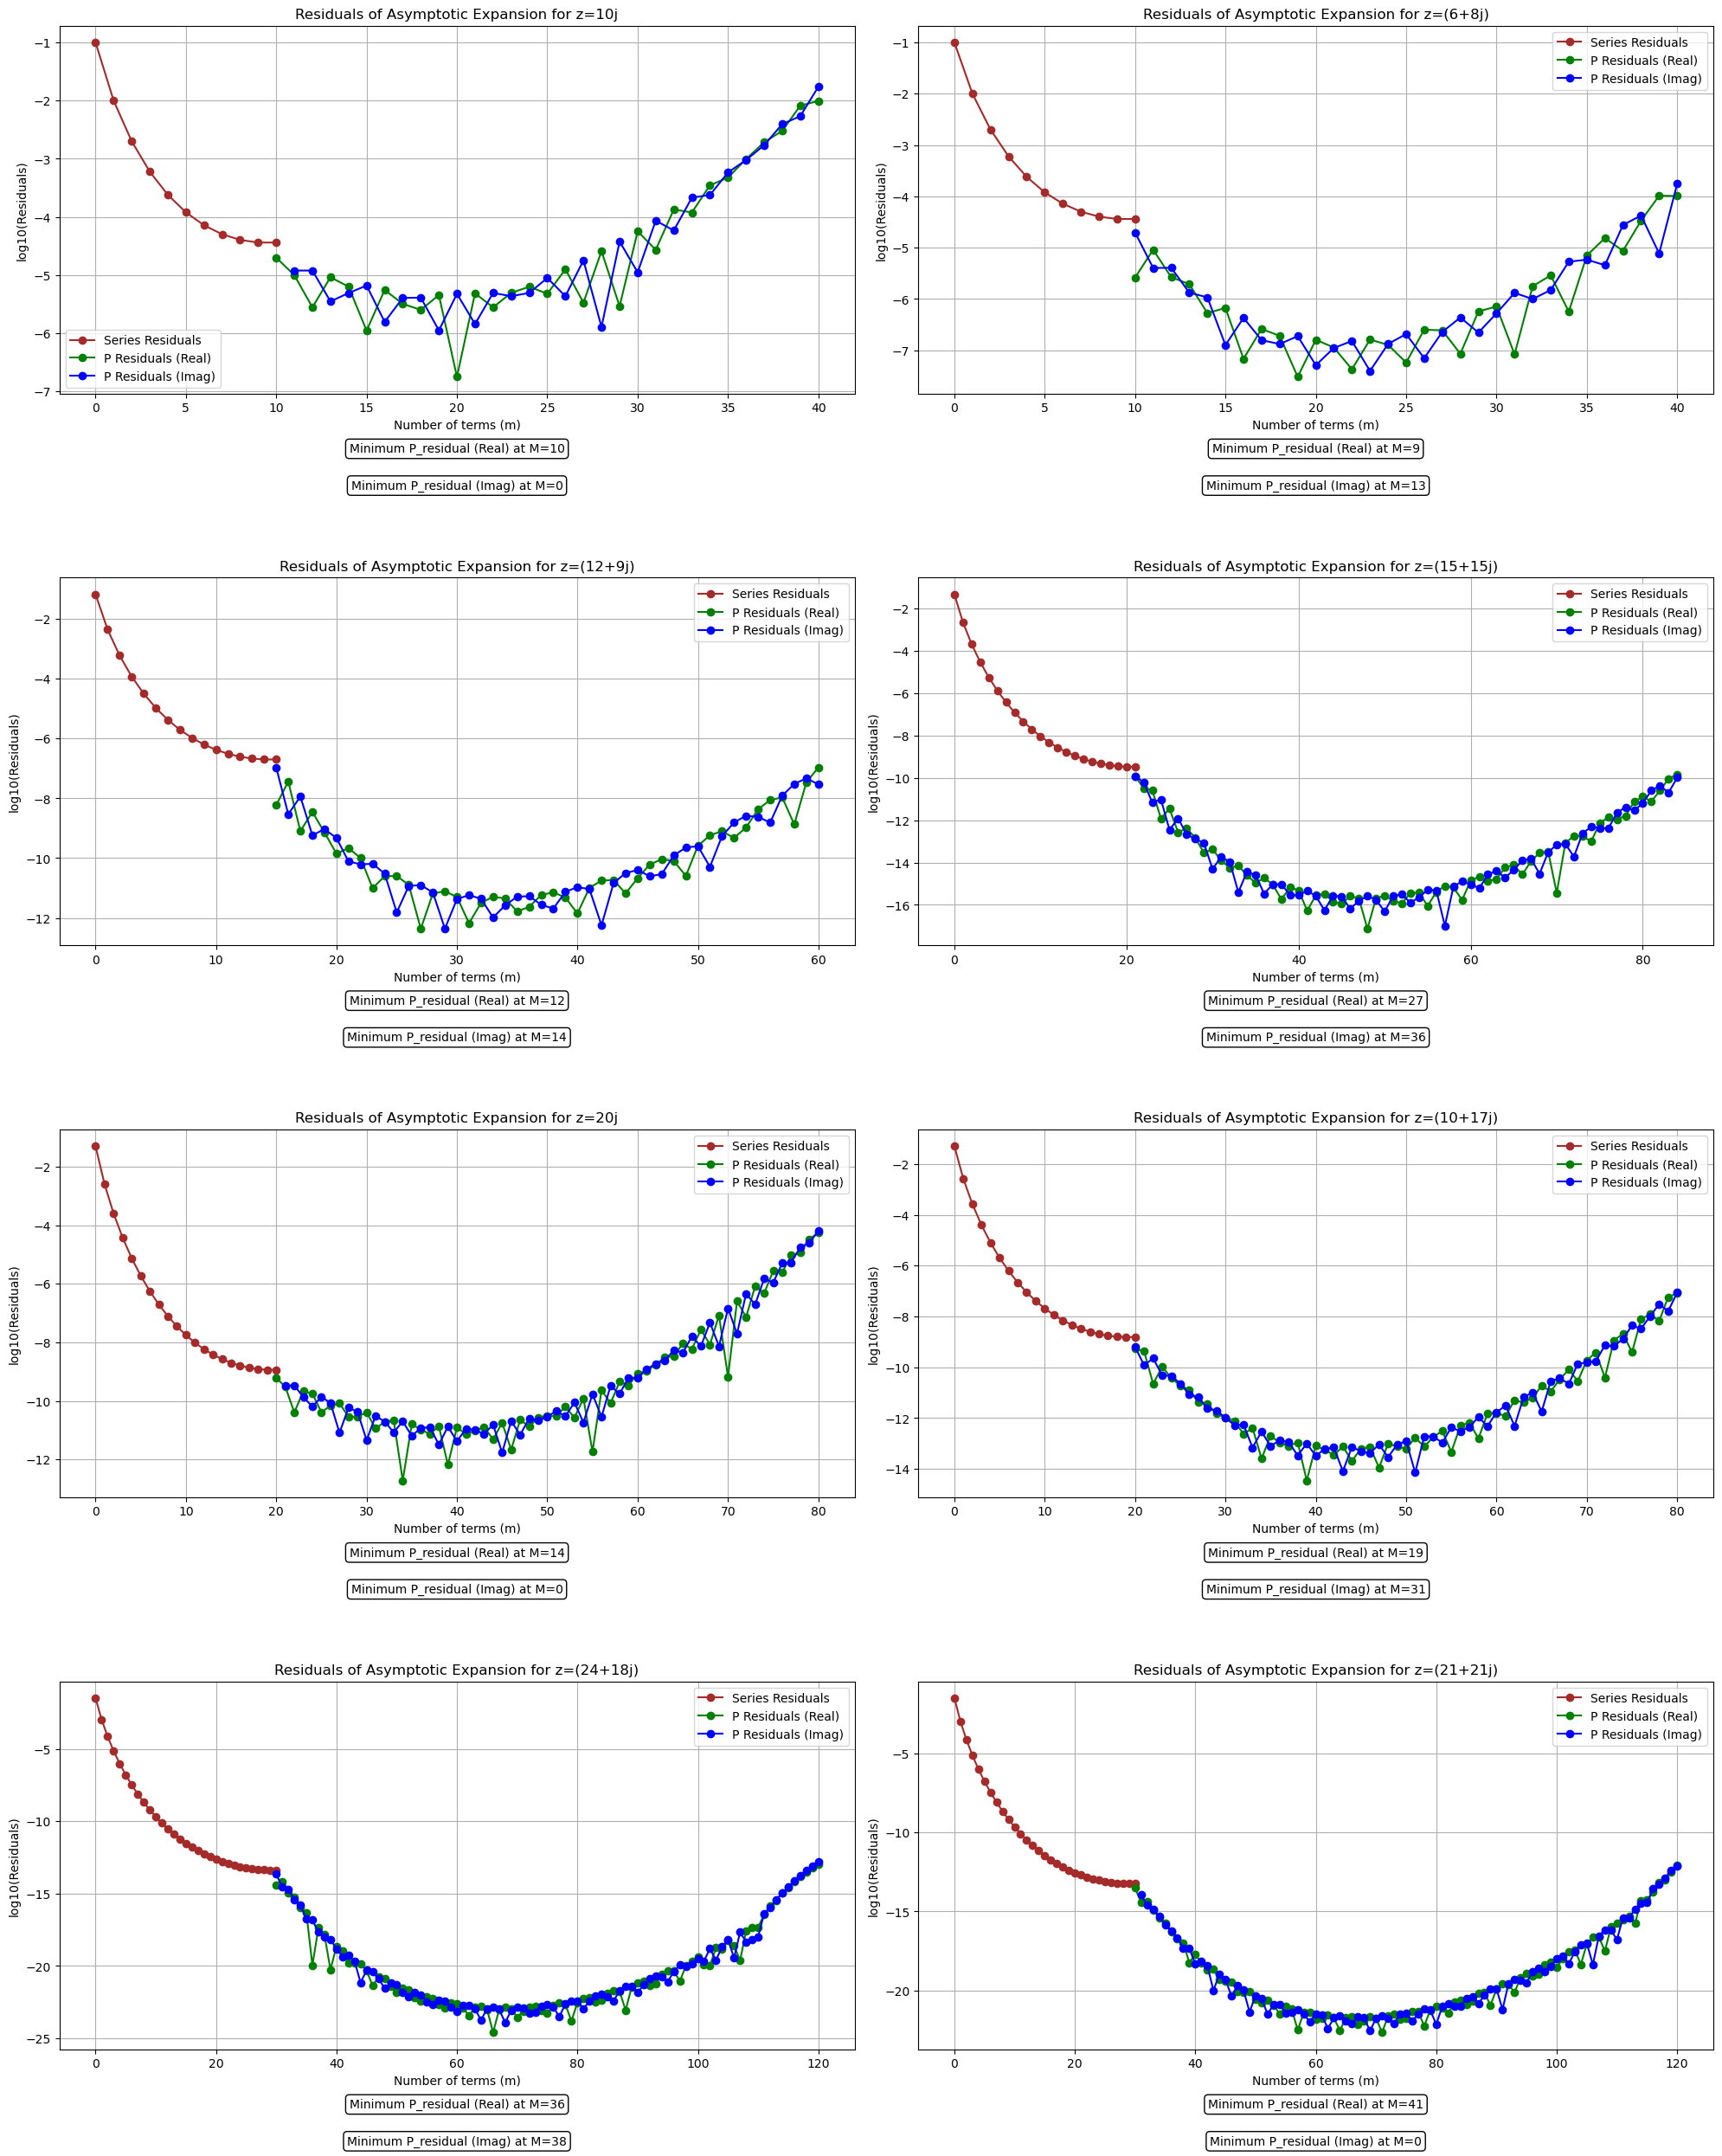

In [49]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gamma
import matplotlib.pyplot as plt
import mpmath

# 定义U函数的实部和虚部积分核
def R(tau, theta):
    return np.sqrt(1 + 2 * tau * np.cos(theta) + tau**2)

def phi(tau, theta):
    return np.arctan2(-tau * np.sin(theta), 1 + tau * np.cos(theta))

def integrand_real(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.cos((b-a-1) * phi_val - a * theta)

def integrand_imag(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.sin((b-a-1) * phi_val - a * theta)

def U(a, b, z):
    r = np.abs(z)
    theta = np.angle(z)
    real_part, real_error = quad(integrand_real, 0, np.inf, args=(r, theta, a, b))
    imag_part, imag_error = quad(integrand_imag, 0, np.inf, args=(r, theta, a, b))
    normalization = 1 / gamma(a)
    return normalization * (real_part + 1j * imag_part)

# 设置 mpmath 精度
mpmath.mp.dps = 50

# 定义 P_m 函数
def P_m(z, m, N, a, b):
    result = mpmath.mpc(0)
    for k in range(m + 1):
        binom_coeff = mpmath.binomial(m, k)
        term = binom_coeff * (-1)**k / z**(N + a + k)
        poch_a = mpmath.rf(a, N + k)  # (a)_{N+k}
        poch_ab = mpmath.rf(a - b + 1, N + k)  # (a-b+1)_{N+k}
        result += term * poch_a * poch_ab / mpmath.fac(N + k)
    return (-1)**(m + 1) * (1/2)**(m + 1) * result

# 定义 R_{N,M} 函数
def R_N_M(z, N, M, a, b):
    sum_result = mpmath.mpc(0)
    for n in range(0, 50):  # 降低上限以避免溢出
        for k in range(M + 1):
            binom_coeff = mpmath.binomial(M, k)
            term = binom_coeff * (-1)**(n + k) / z**(N + a + n + k)
            poch_a = mpmath.rf(a, N + n + k)  # (a)_{N+n+k}
            poch_ab = mpmath.rf(a - b + 1, N + n + k)  # (a-b+1)_{N+n+k}
            sum_result += term * poch_a * poch_ab / mpmath.fac(N + n + k)
    return (-1)**N / (2**M) * sum_result

# Example parameters
a = 2.0
b = 2.0
z_values = [10j, 6 + 8j, 12 + 9j, 15 + 15j, 20j, 10 + 17j, 24 + 18j, 21 + 21j]

# 创建包含多个子图的布局
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()  # 将子图数组展平以便于索引

for idx, z in enumerate(z_values):
    N = round(np.abs(z))
    M_max = 3 * N  # 设定最大项数，以减少计算量

    # 初始化数组存储结果
    P_values_real = np.zeros(M_max + 1, dtype=float)
    P_values_imag = np.zeros(M_max + 1, dtype=float)

    # 计算 P_m 值
    for m in range(M_max + 1):
        P_m_value = P_m(z, m, N, a, b)
        P_values_real[m] = float(P_m_value.real)
        P_values_imag[m] = float(P_m_value.imag)

    # 计算级数项的对数残差
    series_residuals = [mpmath.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
    P_residuals_real = [mpmath.log10(abs(P_values_real[j])) for j in range(M_max + 1)]
    P_residuals_imag = [mpmath.log10(abs(P_values_imag[j])) for j in range(M_max + 1)]

    # 找到 P_residuals 中的最小值及其对应的 M
    min_P_residual_real = min(P_residuals_real)
    min_M_real = P_residuals_real.index(min_P_residual_real)

    min_P_residual_imag = min(P_residuals_imag)
    min_M_imag = P_residuals_imag.index(min_P_residual_imag)

    # 绘制结果
    ax = axes[idx]
    ax.plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals')
    ax.plot(range(N, N + M_max + 1), [float(val) for val in P_residuals_real], 'o-', color='green', label='P Residuals (Real)')
    ax.plot(range(N, N + M_max + 1), [float(val) for val in P_residuals_imag], 'o-', color='blue', label='P Residuals (Imag)')

    # Level 1 residuals
    R_NM_values = []
    for m in range(min(min_M_real, min_M_imag), min(min_M_real, min_M_imag) + 10):  # 从最低点开始计算10个term的Level 1 residual
        R_NM_value = R_N_M(z, m, M_max, a, b)
        R_NM_values.append((m, abs(R_NM_value)))
    
    NM_terms_list, NM_remainder_sizes = zip(*R_NM_values)

    ax.set_xlabel('Number of terms (m)')
    ax.set_ylabel('log10(Residuals)')
    ax.set_title(f'Residuals of Asymptotic Expansion for z={z}')
    ax.grid(True)
    ax.legend()

    # 添加注释显示最小残差对应的 M 值
    ax.annotate(f'Minimum P_residual (Real) at M={min_M_real}', 
                xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', va='center', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    ax.annotate(f'Minimum P_residual (Imag) at M={min_M_imag}', 
                xy=(0.5, -0.25), xycoords='axes fraction', 
                ha='center', va='center', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


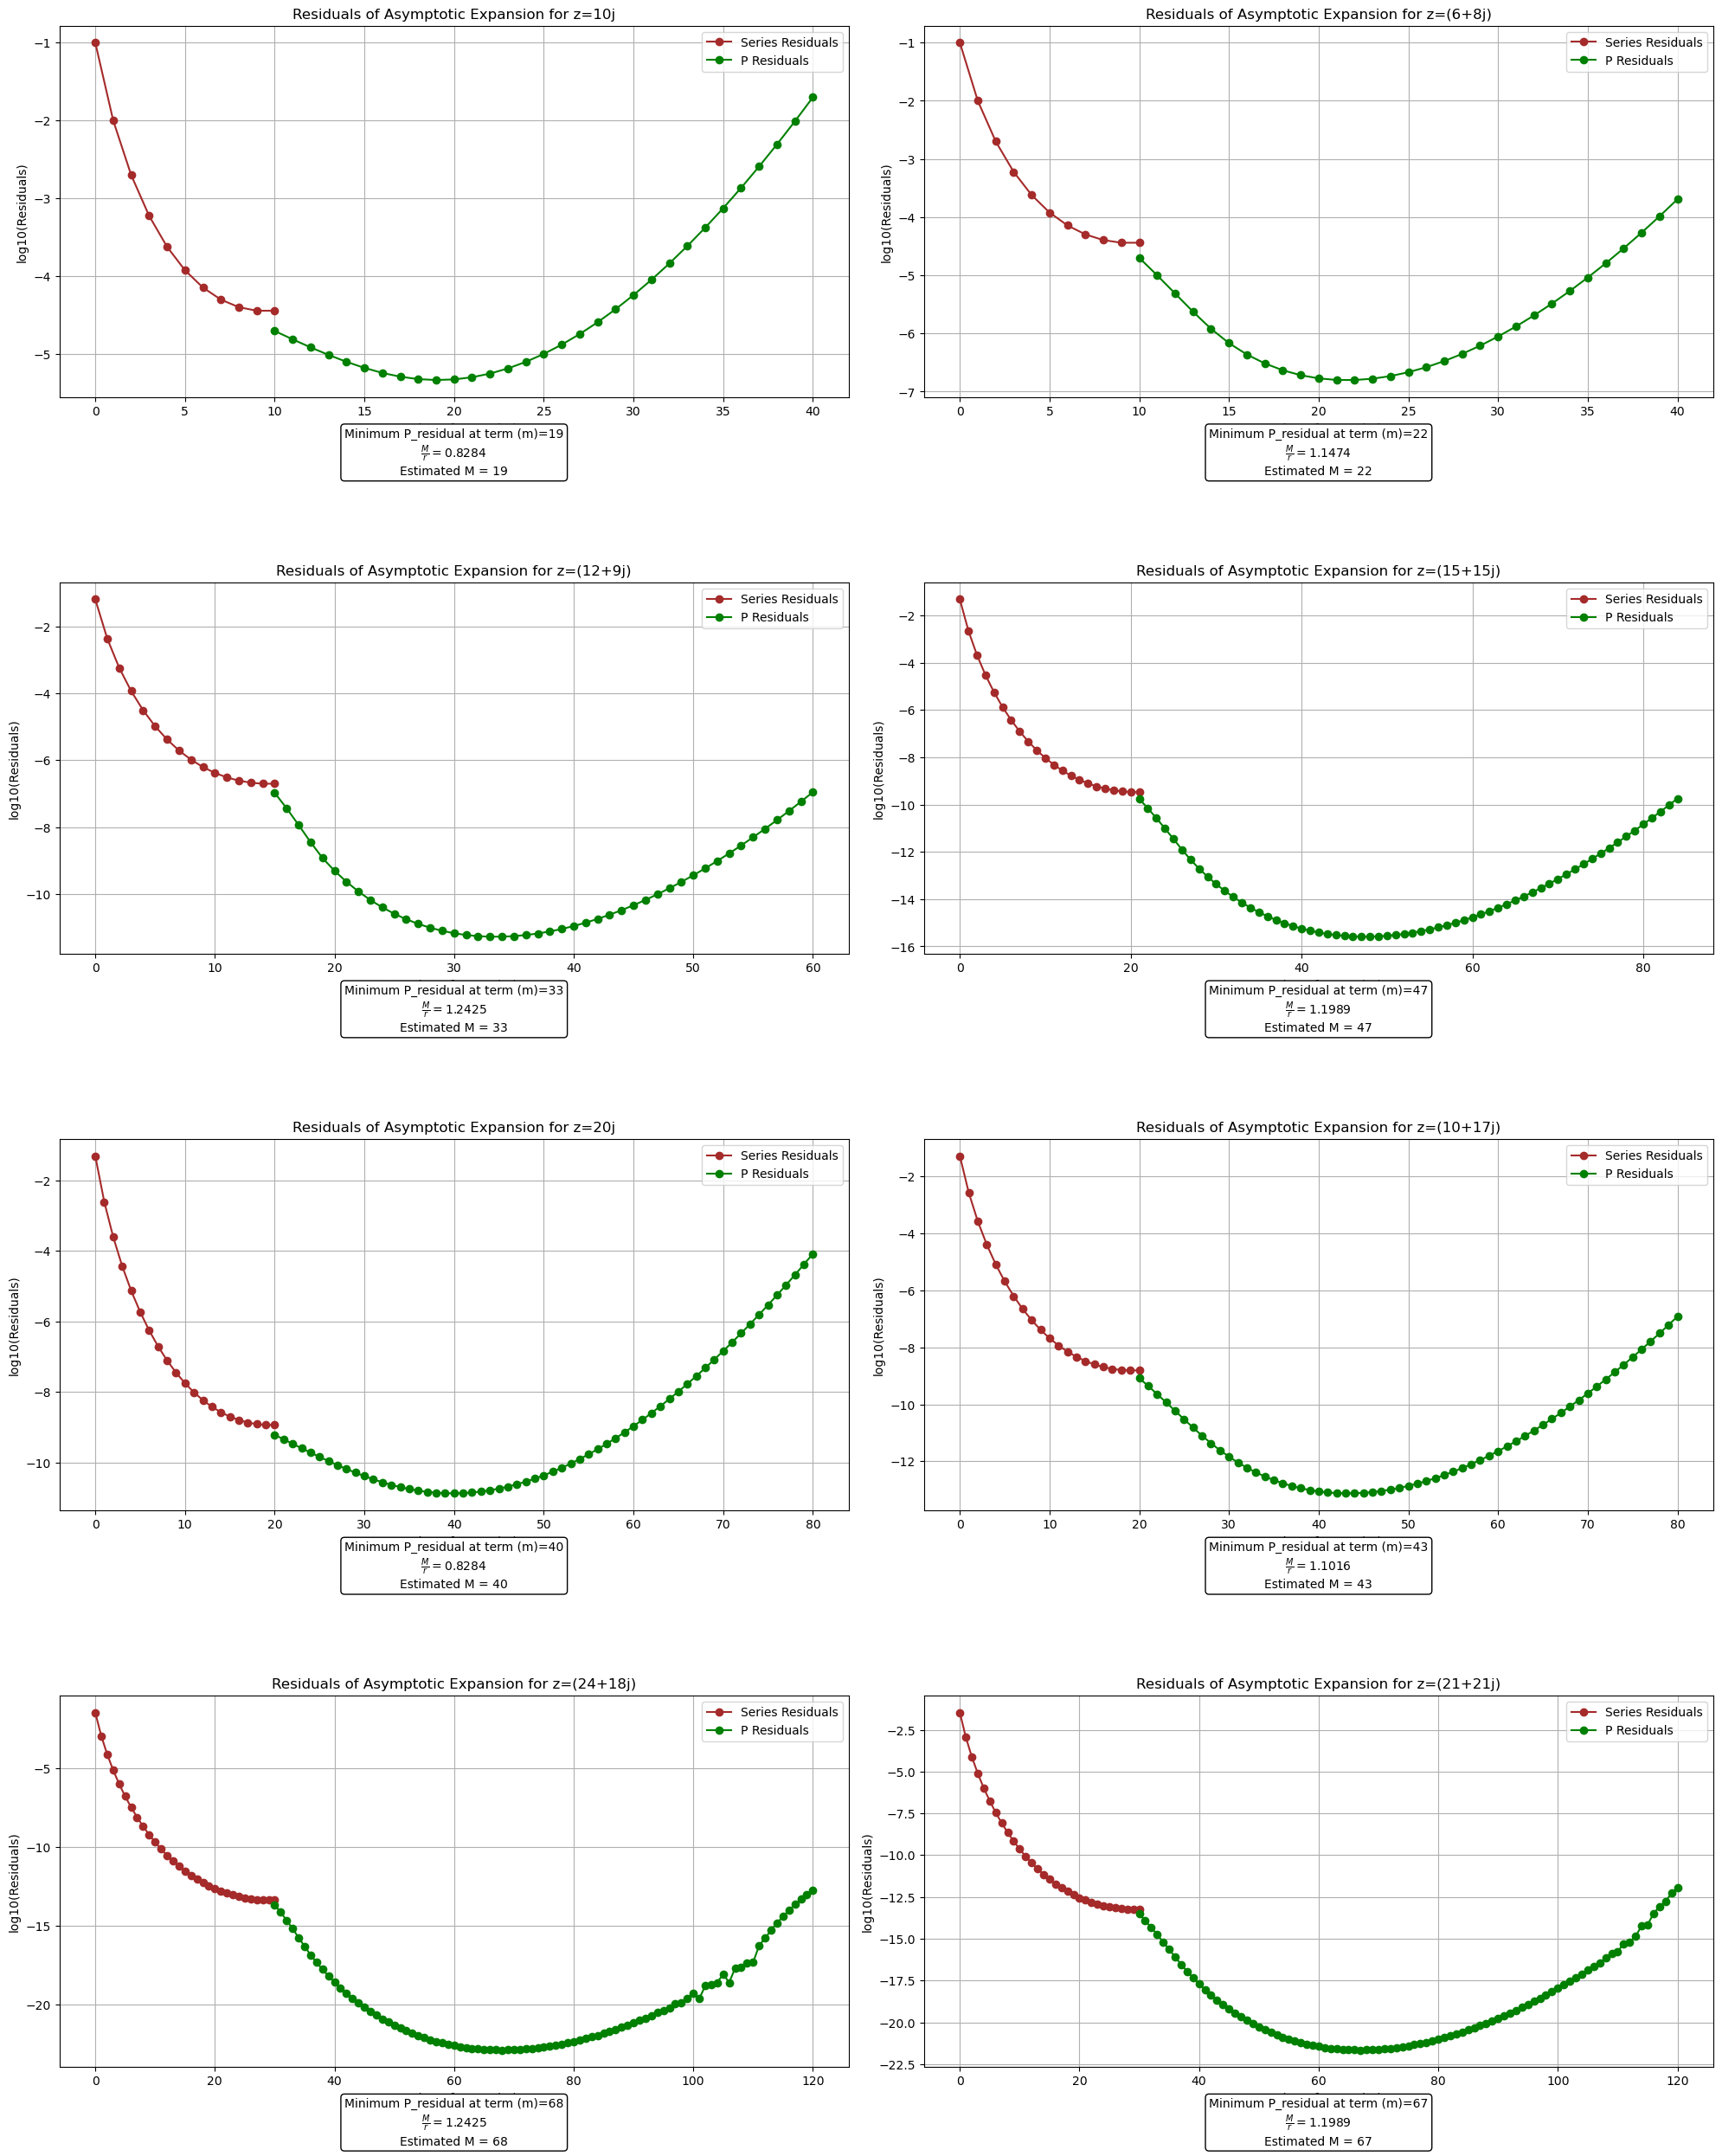

In [51]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gamma
import matplotlib.pyplot as plt
import mpmath
import cmath  # 用于处理复数运算

# 定义U函数的实部和虚部积分核
def R(tau, theta):
    return np.sqrt(1 + 2 * tau * np.cos(theta) + tau**2)

def phi(tau, theta):
    return np.arctan2(-tau * np.sin(theta), 1 + tau * np.cos(theta))

def integrand_real(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.cos((b-a-1) * phi_val - a * theta)

def integrand_imag(tau, r, theta, a, b):
    R_val = R(tau, theta)
    phi_val = phi(tau, theta)
    return np.exp(-r * tau) * tau**(a-1) * R_val**(b-a-1) * np.sin((b-a-1) * phi_val - a * theta)

def U(a, b, z):
    r = np.abs(z)
    theta = np.angle(z)
    real_part, real_error = quad(integrand_real, 0, np.inf, args=(r, theta, a, b))
    imag_part, imag_error = quad(integrand_imag, 0, np.inf, args=(r, theta, a, b))
    normalization = 1 / gamma(a)
    return normalization * (real_part + 1j * imag_part)

# 设置 mpmath 精度
mpmath.mp.dps = 50

# 定义 P_m 函数
def P_m(z, m, N, a, b):
    result = mpmath.mpc(0)
    for k in range(m + 1):
        binom_coeff = mpmath.binomial(m, k)
        term = binom_coeff * (-1)**k / z**(N + a + k)
        poch_a = mpmath.rf(a, N + k)  # (a)_{N+k}
        poch_ab = mpmath.rf(a - b + 1, N + k)  # (a-b+1)_{N+k}
        result += term * poch_a * poch_ab / mpmath.fac(N + k)
    return (-1)**(m + 1) * (1/2)**(m + 1) * result

# 定义 R_{N,M} 函数
def R_N_M(z, N, M, a, b):
    sum_result = mpmath.mpc(0)
    for n in range(0, 50):  # 降低上限以避免溢出
        for k in range(M + 1):
            binom_coeff = mpmath.binomial(M, k)
            term = binom_coeff * (-1)**(n + k) / z**(N + a + n + k)
            poch_a = mpmath.rf(a, N + n + k)  # (a)_{N+n+k}
            poch_ab = mpmath.rf(a - b + 1, N + n + k)  # (a-b+1)_{N+n+k}
            sum_result += term * poch_a * poch_ab / mpmath.fac(N + n + k)
    return (-1)**N / (2**M) * sum_result

# Example parameters
a = 2.0
b = 2.0
z_values = [10j, 6 + 8j, 12 + 9j, 15 + 15j, 20j, 10 + 17j, 24 + 18j, 21 + 21j]

# 创建包含多个子图的布局
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()  # 将子图数组展平以便于索引

for idx, z in enumerate(z_values):
    N = round(np.abs(z))
    M_max = 3 * N  # 设定最大项数，以减少计算量

    # 初始化数组存储结果
    P_values = np.zeros(M_max + 1, dtype=complex)

    # 计算 P_m 值
    for m in range(M_max + 1):
        P_m_value = P_m(z, m, N, a, b)
        P_values[m] = P_m_value

    # 计算级数项的对数残差
    series_residuals = [mpmath.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(N + 1)]
    P_residuals = [mpmath.log10(abs(P_values[j])) for j in range(M_max + 1)]

    # 找到 P_residuals 中的最小值及其对应的 M
    min_P_residual = min(P_residuals)
    min_M = P_residuals.index(min_P_residual)

    # 计算 M/r 的值
    theta = cmath.phase(z)
    e_i_theta = cmath.exp(1j * theta)
    M_over_r = (abs(e_i_theta + 1)**2) / (1 + abs(e_i_theta + 1))

    # 计算 M 的预估值
    estimated_M = min_M + N

    # 绘制结果
    ax = axes[idx]
    ax.plot(range(N + 1), series_residuals, 'o-', color='brown', label='Series Residuals')
    ax.plot(range(N, N + M_max + 1), [float(val) for val in P_residuals], 'o-', color='green', label='P Residuals')

    # Level 1 residuals
    R_NM_values = []
    for m in range(min_M, min_M + 10):  # 从最低点开始计算10个term的Level 1 residual
        R_NM_value = R_N_M(z, m, M_max, a, b)
        R_NM_values.append((m, abs(R_NM_value)))
    
    NM_terms_list, NM_remainder_sizes = zip(*R_NM_values)

    ax.set_xlabel('Number of terms (m)')
    ax.set_ylabel('log10(Residuals)')
    ax.set_title(f'Residuals of Asymptotic Expansion for z={z}')
    ax.grid(True)
    ax.legend()

    # 添加注释显示最低点对应的项数（term）和 M/r 及 M 的估计值
    annotation_text = (f'Minimum P_residual at term (m)={min_M + N}\n'
                       f'$\\frac{{M}}{{r}} = {M_over_r:.4f}$\n'
                       f'Estimated M = {estimated_M}')
    ax.annotate(annotation_text, 
                xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', va='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# 调整子图布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()
